<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="center"><font color='#DEB887'>Super Market Exploratory Data Analysis</font></h3>
<div style="font-family:Georgia;background-color:'black'; font-color:'black',padding:30px; font-size:17px">

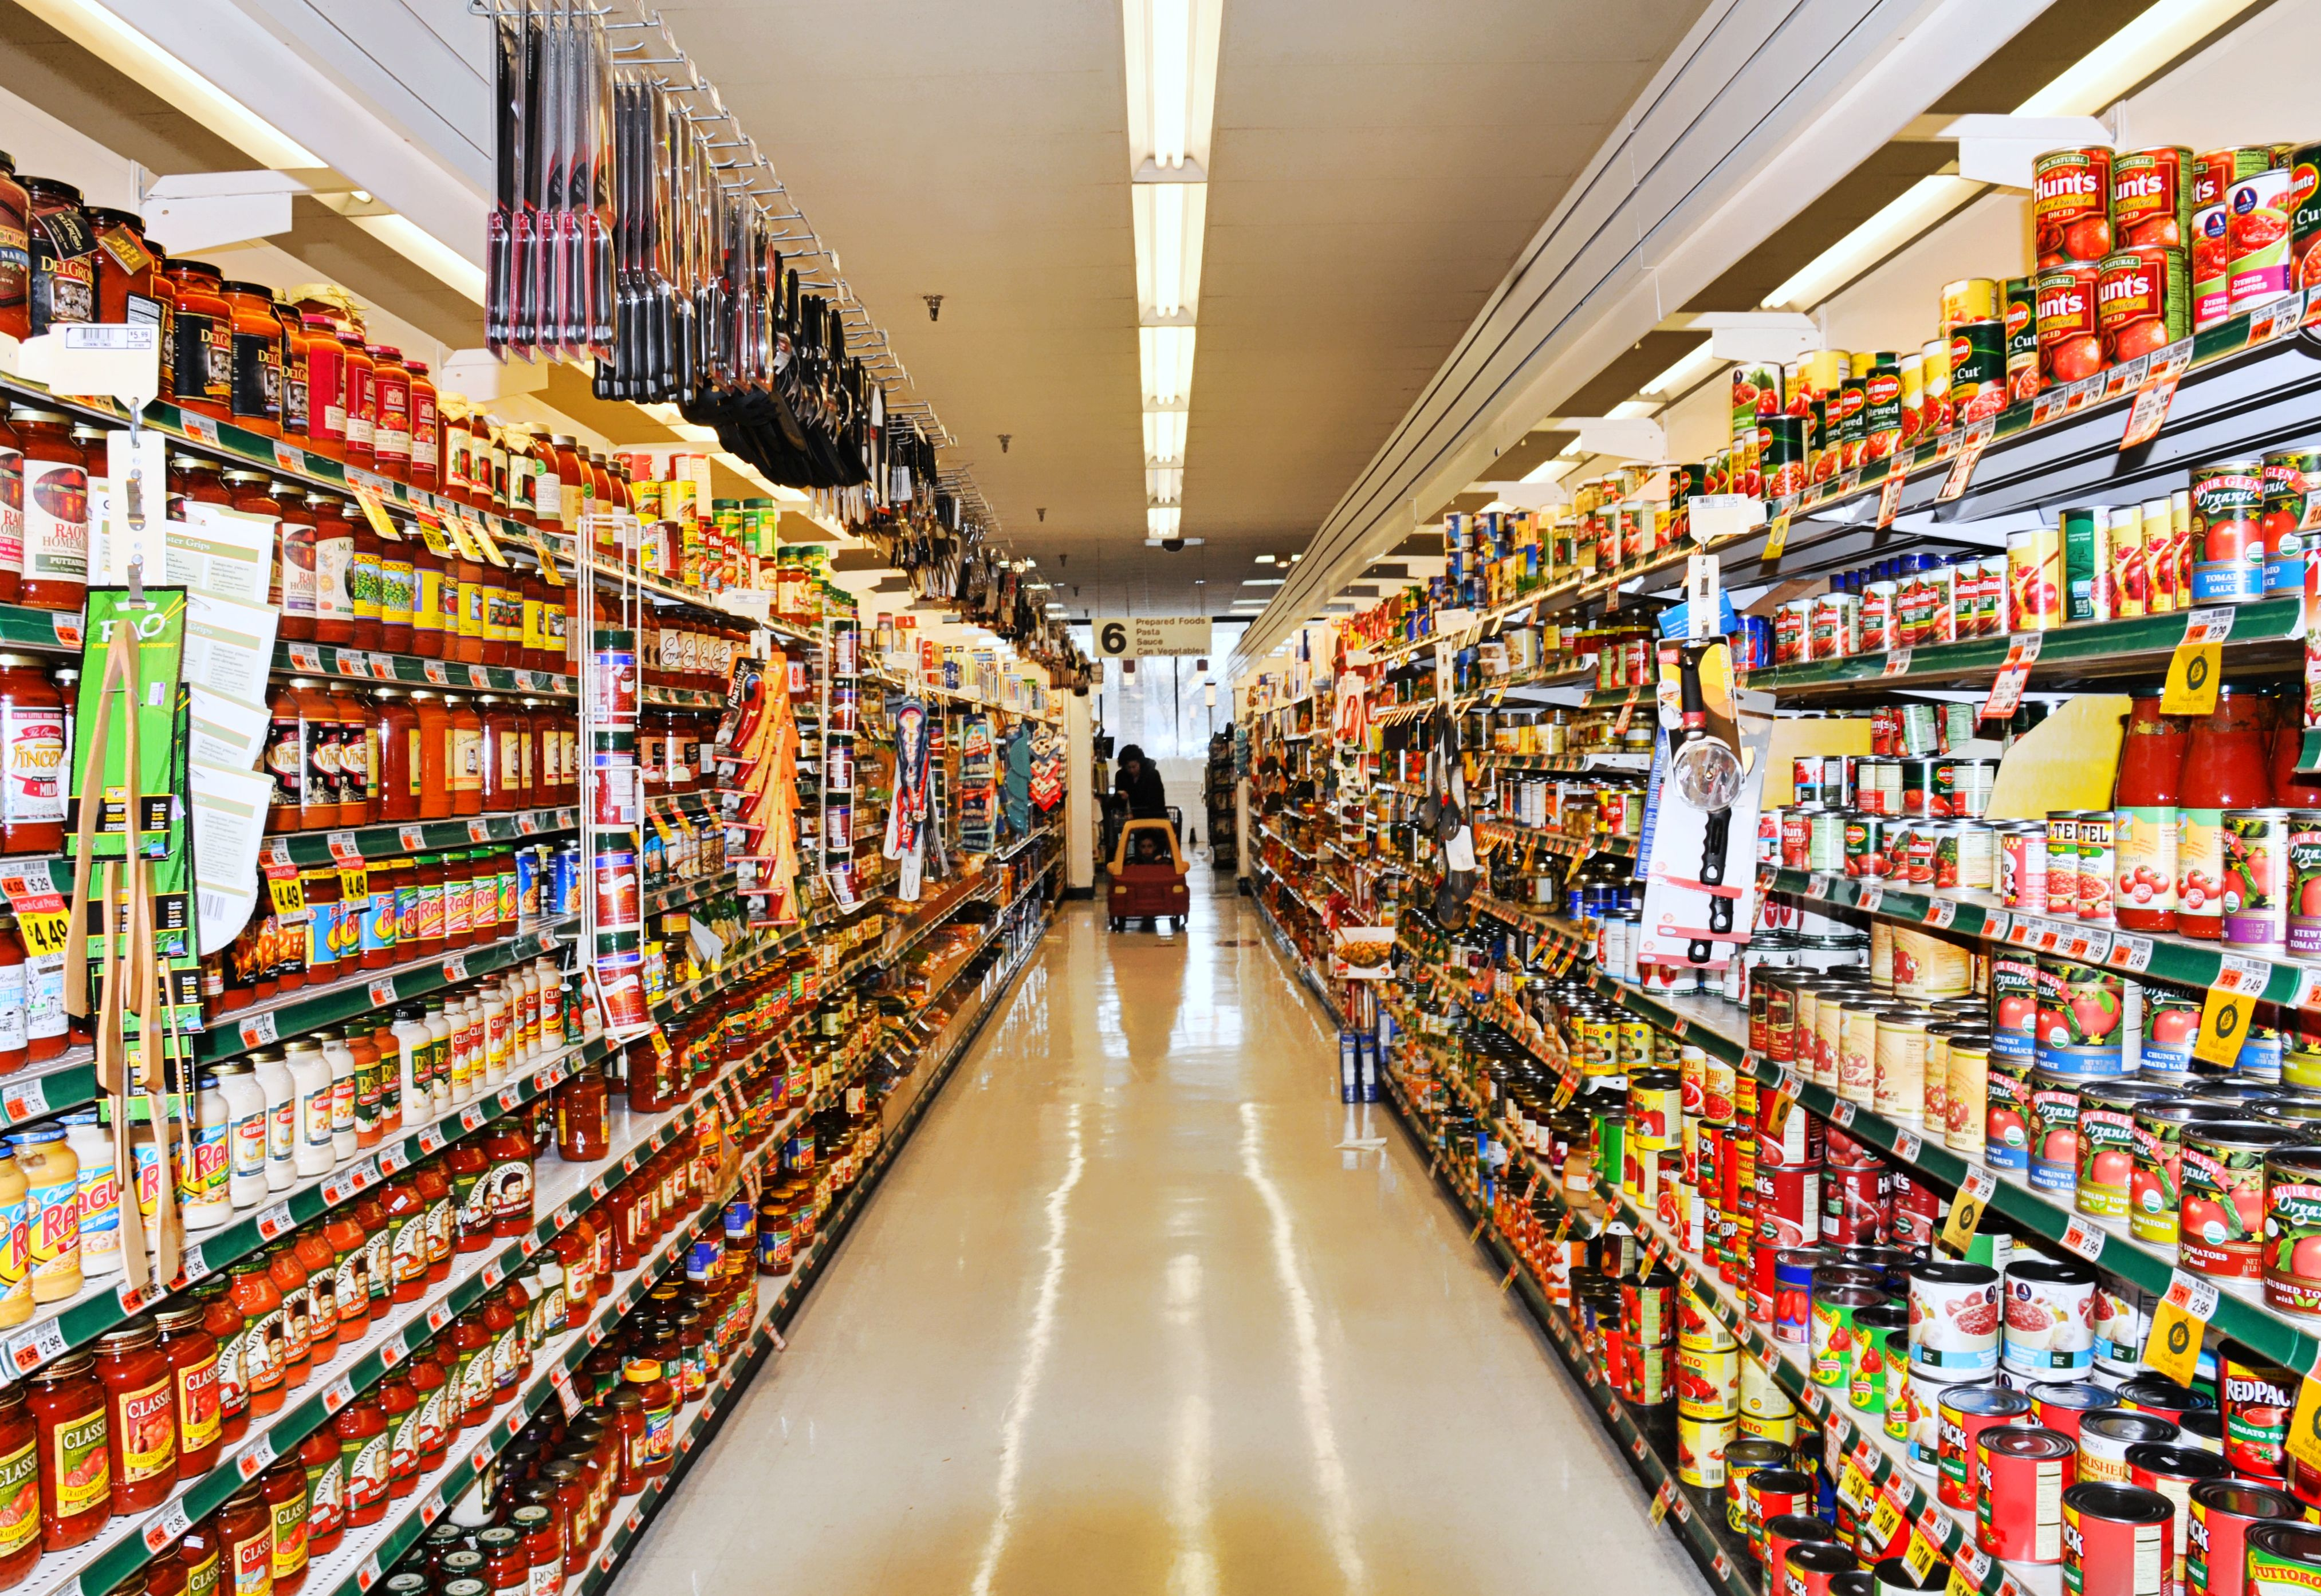

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Goal of  Project :
</p>
</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Source of Data : Kaggle
</p>
</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Work Flow
</p>
</div>

- Step 1-- importing the required libraries...
- step 2-- loading the data set
- step 3-- Basic understanding of data
- step 4-- Preprocessing

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Step 1: Importing the Required Libraries
</p>
</div>




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Step 2: Loading the data set
</p>
</div>




In [2]:
df=pd.read_csv("D:\\data\\data sets\\supermarket_sales - Sheet1.csv")

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Step 3: Basic understanding of Data
</p>
</div>




# Preview of data

In [3]:
df.head(3)

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total      Date  \
0       Health and beauty       74.69         7  26.1415  548.9715  1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200  3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255  3/3/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4

In [4]:
df['Branch'].unique()

array(['A', 'C', 'B'], dtype=object)

**Observation**
- Here we can see there are 3 branches under this dataset Branch(A,B,C)

In [5]:
df.groupby('Branch')['City'].unique()

Branch
A       [Yangon]
B     [Mandalay]
C    [Naypyitaw]
Name: City, dtype: object

**Observations**
- Here we can Considered Branch A as Yangon City and Branch B as Mandalay and Branch C as Naypyitaw and both the columns are interdependent on each other so we can do analysis only with single column either Branch or City so i took decision to drop branch column and do further analysis with city column

# How big is the data

In [6]:
df.shape

(1000, 17)

**observation**:
- This Dataset has 1000 rows and 17 columns....

# Basic information of data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

**observation:**
- from above output , all columns are in appropriate type except date and time so we need to convert     into datetime for better analysis
- and also the column invoice id is seems irrelavant wrt to EDA so we will drop it later.

In [8]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

####  Column Description

- Invoice id: Computer generated sales slip invoice identification number

- Branch: Branch of supercenter (3 branches are available identified by A, B and C).

- City: Location of supercenters

- Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

- Gender: Gender type of customer

- Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
- Unit price: Price of each product in $

- Quantity: Number of products purchased by customer

- Tax: 5% tax fee for customer buying

- Total: Total price including tax

- Date: Date of purchase (Record available from January 2019 to March 2019)

- Time: Purchase time (10am to 9pm)

- Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

- COGS: Cost of goods sold

- Gross margin percentage: Gross margin percentage
- Gross income: Gross income

- Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)






<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Step 4: Preprocessing Step
</p>
</div>




# Detection of Missing Values

In [9]:
df.isnull().sum().to_frame().rename(columns={0:"Missing Value Counts"}).T

Invoice ID  Branch  City  Customer type  Gender  \
Missing Value Counts           0       0     0              0       0   

                      Product line  Unit price  Quantity  Tax 5%  Total  Date  \
Missing Value Counts             0           0         0       0      0     0   

                      Time  Payment  cogs  gross margin percentage  \
Missing Value Counts     0        0     0                        0   

                      gross income  Rating  
Missing Value Counts             0       0

# Since there is no any missing values under the Dataset......

# Detection of Duplicated Values.......

In [10]:
df.duplicated().sum()

0

# Since there is no any duplicate values under the Dataset......

## since the invoice id is irrelavant column so we drop  and also we are dropping the Branch column since each  branch maps to each city as below:

- Mandalay     [B]
- Naypyitaw    [C]
- Yangon       [A]




In [11]:
df.drop(columns=['Invoice ID','Branch'],inplace=True) # Already done

In [12]:
df.shape

(1000, 15)

# Checking the Inconsistency or Invalid Value in the columns

** First segregation the data into object and numeric types and check the inconsistency accordingly **

In [13]:
df_obj=df.select_dtypes(include='object')
df_obj

City Customer type  Gender            Product line       Date  \
0       Yangon        Member  Female       Health and beauty   1/5/2019   
1    Naypyitaw        Normal  Female  Electronic accessories   3/8/2019   
2       Yangon        Normal    Male      Home and lifestyle   3/3/2019   
3       Yangon        Member    Male       Health and beauty  1/27/2019   
4       Yangon        Normal    Male       Sports and travel   2/8/2019   
..         ...           ...     ...                     ...        ...   
995  Naypyitaw        Normal    Male       Health and beauty  1/29/2019   
996   Mandalay        Normal  Female      Home and lifestyle   3/2/2019   
997     Yangon        Member    Male      Food and beverages   2/9/2019   
998     Yangon        Normal    Male      Home and lifestyle  2/22/2019   
999     Yangon        Member  Female     Fashion accessories  2/18/2019   

      Time      Payment  
0    13:08      Ewallet  
1    10:29         Cash  
2    13:23  Credit card  
3    20:33      Ewallet  
4    10:37      Ewallet  
..     ...          ...  
995  13:46      Ewallet  
996  17:16      Ewallet  
997  13:22         Cash  
998  15:33         Cash  
999  13:28         Cash  

[1000 rows x 7 columns]

In [14]:
for col in df_obj.columns:
    print(col,'----------------',df[col].unique(),'has',df[col].nunique(),'Values','\n\n')

City ---------------- ['Yangon' 'Naypyitaw' 'Mandalay'] has 3 Values 


Customer type ---------------- ['Member' 'Normal'] has 2 Values 


Gender ---------------- ['Female' 'Male'] has 2 Values 


Product line ---------------- ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories'] has 6 Values 


Date ---------------- ['1/5/2019' '3/8/2019' '3/3/2019' '1/27/2019' '2/8/2019' '3/25/2019'
 '2/25/2019' '2/24/2019' '1/10/2019' '2/20/2019' '2/6/2019' '3/9/2019'
 '2/12/2019' '2/7/2019' '3/29/2019' '1/15/2019' '3/11/2019' '1/1/2019'
 '1/21/2019' '3/5/2019' '3/15/2019' '2/17/2019' '3/2/2019' '3/22/2019'
 '3/10/2019' '1/25/2019' '1/28/2019' '1/7/2019' '3/23/2019' '1/17/2019'
 '2/2/2019' '3/4/2019' '3/16/2019' '2/27/2019' '2/10/2019' '3/19/2019'
 '2/3/2019' '3/7/2019' '2/28/2019' '3/27/2019' '1/20/2019' '3/12/2019'
 '2/15/2019' '3/6/2019' '2/14/2019' '3/13/2019' '1/24/2019' '1/6/2019'
 '2/11/2019' '1/22/2019' '1/13/2019'

In [15]:
df_numeric=df.select_dtypes(exclude='object')
for col in df_numeric.columns:
    print(col,'-----------------',df_numeric[col].unique(),'has',df_numeric[col].nunique(),'values','\n\n')

Unit price ----------------- [74.69 15.28 46.33 58.22 86.31 85.39 68.84 73.56 36.26 54.84 14.48 25.51
 46.95 43.19 71.38 93.72 68.93 72.61 54.67 40.3  86.04 87.98 33.2  34.56
 88.63 52.59 33.52 87.67 88.36 24.89 94.13 78.07 83.78 96.58 99.42 68.12
 62.62 60.88 54.92 30.12 86.72 56.11 69.12 98.7  15.37 93.96 56.69 20.01
 18.93 82.63 91.4  44.59 17.87 15.43 16.16 85.98 44.34 89.6  72.35 30.61
 24.74 55.73 55.07 15.81 75.74 15.87 33.47 97.61 78.77 18.33 89.48 62.12
 48.52 75.91 74.67 41.65 49.04 78.31 20.38 99.19 96.68 19.25 80.36 48.91
 83.06 76.52 49.38 42.47 76.99 47.38 44.86 21.98 64.36 89.75 97.16 87.87
 12.45 52.75 82.7  48.71 78.55 23.07 58.26 30.35 88.67 27.38 62.13 33.98
 81.97 16.49 98.21 72.84 58.07 80.79 27.02 21.94 51.36 10.96 53.44 99.56
 57.12 99.96 63.91 56.47 93.69 32.25 31.73 68.54 90.28 39.62 92.13 34.84
 87.45 81.3  90.22 26.31 34.42 51.91 72.5  89.8  90.5  68.6  30.41 77.95
 46.26 30.14 66.14 71.86 32.46 91.54 83.24 16.48 80.97 92.29 72.17 50.28
 97.22 93.39 43.18 63.

 # From abv loop i cannot see from my naked eye where is the data is inconsistent or invalid 

# so we will use the loop concept

In [16]:
df_numeric=df.select_dtypes(exclude=['object','datetime64[ns]'])
for col in df_numeric.columns:
    for i in df_numeric[col]:
        if i<0:
            print("invalid value")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City                     1000 non-null   object 
 1   Customer type            1000 non-null   object 
 2   Gender                   1000 non-null   object 
 3   Product line             1000 non-null   object 
 4   Unit price               1000 non-null   float64
 5   Quantity                 1000 non-null   int64  
 6   Tax 5%                   1000 non-null   float64
 7   Total                    1000 non-null   float64
 8   Date                     1000 non-null   object 
 9   Time                     1000 non-null   object 
 10  Payment                  1000 non-null   object 
 11  cogs                     1000 non-null   float64
 12  gross margin percentage  1000 non-null   float64
 13  gross income             1000 non-null   float64
 14  Rating                   

In [18]:
from datetime import datetime as dt

In [19]:
df["Date"]=pd.to_datetime(df["Date"])
df["Time"]=pd.to_datetime(df["Time"])
df.dtypes

C:\Users\acer\AppData\Local\Temp\ipykernel_13324\1097182486.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Time"]=pd.to_datetime(df["Time"])


City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                       datetime64[ns]
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

# Feature Engineering column Extraction

In [20]:
df["month"]=df.Date.dt.month_name()
df["day_name"]=df.Date.dt.day_name()
df["day"]=df.Date.dt.day
df["year"]=df.Date.dt.year
df["Hour"]=df.Time.dt.hour


In [21]:
df.head(2)

City Customer type  Gender            Product line  Unit price  \
0     Yangon        Member  Female       Health and beauty       74.69   
1  Naypyitaw        Normal  Female  Electronic accessories       15.28   

   Quantity   Tax 5%     Total       Date                Time  Payment  \
0         7  26.1415  548.9715 2019-01-05 2024-05-31 13:08:00  Ewallet   
1         5   3.8200   80.2200 2019-03-08 2024-05-31 10:29:00     Cash   

     cogs  gross margin percentage  gross income  Rating    month  day_name  \
0  522.83                 4.761905       26.1415     9.1  January  Saturday   
1   76.40                 4.761905        3.8200     9.6    March    Friday   

   day  year  Hour  
0    5  2019    13  
1    8  2019    10

# Insights of the Dataset

In [22]:
df.columns

Index(['City', 'Customer type', 'Gender', 'Product line', 'Unit price',
       'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs',
       'gross margin percentage', 'gross income', 'Rating', 'month',
       'day_name', 'day', 'year', 'Hour'],
      dtype='object')

In [23]:
df.describe().T

count                        mean  \
Unit price               1000.0                    55.67213   
Quantity                 1000.0                        5.51   
Tax 5%                   1000.0                   15.379369   
Total                    1000.0                  322.966749   
Date                       1000  2019-02-14 00:05:45.600000   
Time                       1000  2024-05-31 15:24:41.880000   
cogs                     1000.0                   307.58738   
gross margin percentage  1000.0                    4.761905   
gross income             1000.0                   15.379369   
Rating                   1000.0                      6.9727   
day                      1000.0                      15.256   
year                     1000.0                      2019.0   
Hour                     1000.0                       14.91   

                                         min                  25%  \
Unit price                             10.08               32.875   
Quantity                                 1.0                  3.0   
Tax 5%                                0.5085             5.924875   
Total                                10.6785           124.422375   
Date                     2019-01-01 00:00:00  2019-01-24 00:00:00   
Time                     2024-05-31 10:00:00  2024-05-31 12:43:00   
cogs                                   10.17             118.4975   
gross margin percentage             4.761905             4.761905   
gross income                          0.5085             5.924875   
Rating                                   4.0                  5.5   
day                                      1.0                  8.0   
year                                  2019.0               2019.0   
Hour                                    10.0                 12.0   

                                         50%                  75%  \
Unit price                             55.23               77.935   
Quantity                                 5.0                  8.0   
Tax 5%                                12.088             22.44525   
Total                                253.848            471.35025   
Date                     2019-02-13 00:00:00  2019-03-08 00:00:00   
Time                     2024-05-31 15:19:00  2024-05-31 18:15:00   
cogs                                  241.76              448.905   
gross margin percentage             4.761905             4.761905   
gross income                          12.088             22.44525   
Rating                                   7.0                  8.5   
day                                     15.0                 23.0   
year                                  2019.0               2019.0   
Hour                                    15.0                 18.0   

                                         max         std  
Unit price                             99.96   26.494628  
Quantity                                10.0    2.923431  
Tax 5%                                 49.65   11.708825  
Total                                1042.65  245.885335  
Date                     2019-03-30 00:00:00         NaN  
Time                     2024-05-31 20:59:00         NaN  
cogs                                   993.0   234.17651  
gross margin percentage             4.761905         0.0  
gross income                           49.65   11.708825  
Rating                                  10.0     1.71858  
day                                     31.0    8.693563  
year                                  2019.0         0.0  
Hour                                    20.0    3.186857

In [24]:
df.describe().T.iloc[:-3]

count                        mean  \
Unit price               1000.0                    55.67213   
Quantity                 1000.0                        5.51   
Tax 5%                   1000.0                   15.379369   
Total                    1000.0                  322.966749   
Date                       1000  2019-02-14 00:05:45.600000   
Time                       1000  2024-05-31 15:24:41.880000   
cogs                     1000.0                   307.58738   
gross margin percentage  1000.0                    4.761905   
gross income             1000.0                   15.379369   
Rating                   1000.0                      6.9727   

                                         min                  25%  \
Unit price                             10.08               32.875   
Quantity                                 1.0                  3.0   
Tax 5%                                0.5085             5.924875   
Total                                10.6785           124.422375   
Date                     2019-01-01 00:00:00  2019-01-24 00:00:00   
Time                     2024-05-31 10:00:00  2024-05-31 12:43:00   
cogs                                   10.17             118.4975   
gross margin percentage             4.761905             4.761905   
gross income                          0.5085             5.924875   
Rating                                   4.0                  5.5   

                                         50%                  75%  \
Unit price                             55.23               77.935   
Quantity                                 5.0                  8.0   
Tax 5%                                12.088             22.44525   
Total                                253.848            471.35025   
Date                     2019-02-13 00:00:00  2019-03-08 00:00:00   
Time                     2024-05-31 15:19:00  2024-05-31 18:15:00   
cogs                                  241.76              448.905   
gross margin percentage             4.761905             4.761905   
gross income                          12.088             22.44525   
Rating                                   7.0                  8.5   

                                         max         std  
Unit price                             99.96   26.494628  
Quantity                                10.0    2.923431  
Tax 5%                                 49.65   11.708825  
Total                                1042.65  245.885335  
Date                     2019-03-30 00:00:00         NaN  
Time                     2024-05-31 20:59:00         NaN  
cogs                                   993.0   234.17651  
gross margin percentage             4.761905         0.0  
gross income                           49.65   11.708825  
Rating                                  10.0     1.71858

In [25]:
df.describe().T.iloc[:-3].index

Index(['Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'cogs',
       'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

In [26]:
l=['Unit price', 'Quantity', 'Tax 5%', 'Total','cogs',
       'gross margin percentage', 'gross income', 'Rating']

cols=l

In [27]:
for i in cols:
    print(i)

Unit price
Quantity
Tax 5%
Total
cogs
gross margin percentage
gross income
Rating


In [28]:
import seaborn as sns

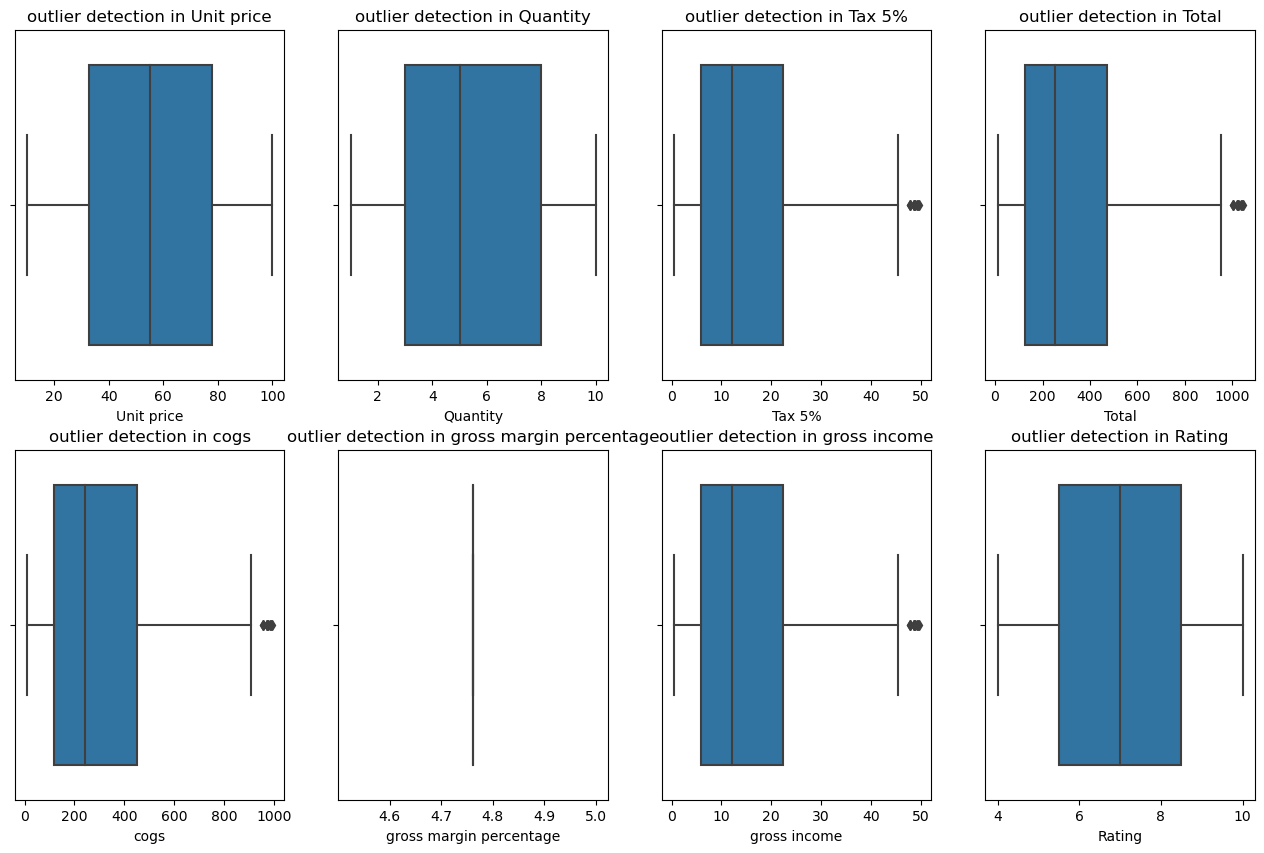

In [29]:
#When we embedded the value of variable in string then i use string format function concept...as below
pos=1
plt.figure(figsize=(16,10))
for col in cols:
    plt.subplot(2,4,pos)
    sns.boxplot(x=col,data=df)
    plt.title(f"outlier detection in {col}")
    pos=pos+1

**Observations**
- Boxplot showing outliers in some of the columns like Total, Tax, COGS, Gross Income and we can 
  easily judge that they all are right skew.
- There might be a correlation among them.
- and Rest of the Boxplot such as Unit Price, Quantity, Rating does not have any outliers.
- Most of the people spent their money near about $150 to $500.
- Gross Margin contains only single entry so that's why it seems like single line in boxplot.

C:\Users\acer\AppData\Local\Temp\ipykernel_13324\3752341398.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\acer\AppData\Local\Temp\ipykernel_13324\3752341398.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\acer\AppData\Local\Temp\ipykernel_13324\37523

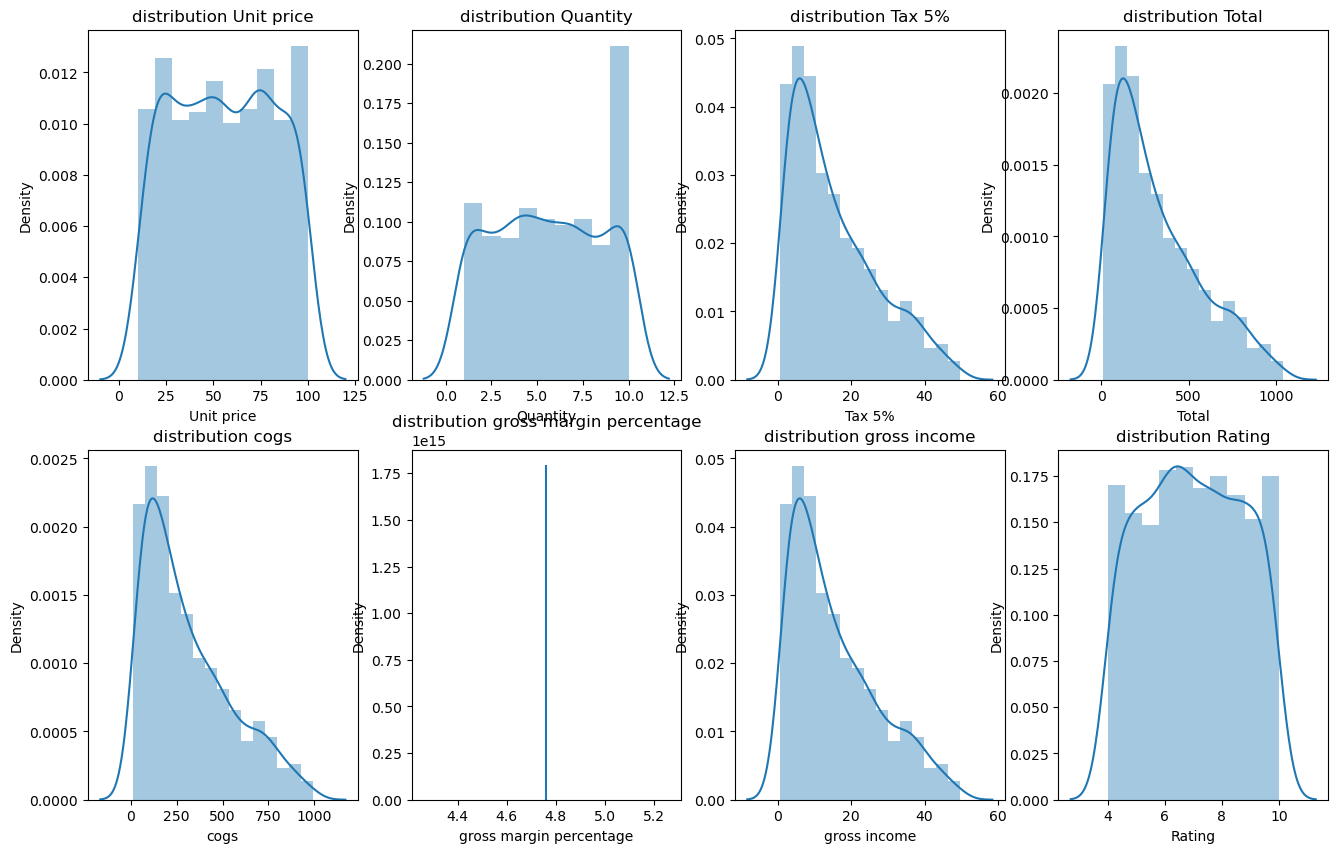

In [30]:
pos=1
plt.figure(figsize=(16,10))
for col in cols:
    plt.subplot(2,4,pos)
    sns.distplot(df[col])
    plt.title(f"distribution {col}")
    pos=pos+1

**Observations**
- As we see some of the columns have identical right skewed.
- So their might be a correlation among them and we can find that relation while using correlation 
  concept

In [31]:
df[cols].corr()

Unit price  Quantity    Tax 5%     Total      cogs  \
Unit price                 1.000000  0.010778  0.633962  0.633962  0.633962   
Quantity                   0.010778  1.000000  0.705510  0.705510  0.705510   
Tax 5%                     0.633962  0.705510  1.000000  1.000000  1.000000   
Total                      0.633962  0.705510  1.000000  1.000000  1.000000   
cogs                       0.633962  0.705510  1.000000  1.000000  1.000000   
gross margin percentage         NaN       NaN       NaN       NaN       NaN   
gross income               0.633962  0.705510  1.000000  1.000000  1.000000   
Rating                    -0.008778 -0.015815 -0.036442 -0.036442 -0.036442   

                         gross margin percentage  gross income    Rating  
Unit price                                   NaN      0.633962 -0.008778  
Quantity                                     NaN      0.705510 -0.015815  
Tax 5%                                       NaN      1.000000 -0.036442  
Total                                        NaN      1.000000 -0.036442  
cogs                                         NaN      1.000000 -0.036442  
gross margin percentage                      NaN           NaN       NaN  
gross income                                 NaN      1.000000 -0.036442  
Rating                                       NaN     -0.036442  1.000000

# Show in Heatmap for Better readability...

<Axes: >

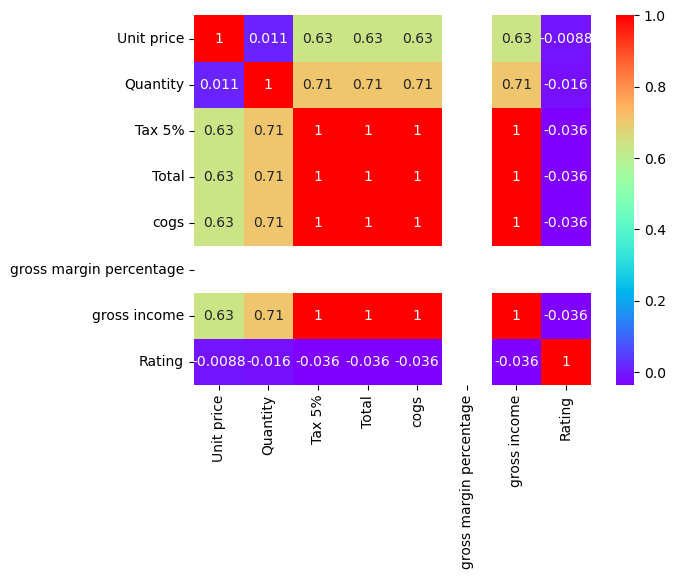

In [32]:
sns.heatmap(df[cols].corr(),annot=True,cmap='rainbow')

# Observation
- There is perfect positive relation between Total, Gross income, tax 5%, cogs
- There is sort of positive relation between total , quantity
- there is no correlation between rating and quantity and total

In [33]:
df.drop(columns=['Tax 5%','cogs','gross income','gross margin percentage'],inplace=True)

In [34]:
df.head()

City Customer type  Gender            Product line  Unit price  \
0     Yangon        Member  Female       Health and beauty       74.69   
1  Naypyitaw        Normal  Female  Electronic accessories       15.28   
2     Yangon        Normal    Male      Home and lifestyle       46.33   
3     Yangon        Member    Male       Health and beauty       58.22   
4     Yangon        Normal    Male       Sports and travel       86.31   

   Quantity     Total       Date                Time      Payment  Rating  \
0         7  548.9715 2019-01-05 2024-05-31 13:08:00      Ewallet     9.1   
1         5   80.2200 2019-03-08 2024-05-31 10:29:00         Cash     9.6   
2         7  340.5255 2019-03-03 2024-05-31 13:23:00  Credit card     7.4   
3         8  489.0480 2019-01-27 2024-05-31 20:33:00      Ewallet     8.4   
4         7  634.3785 2019-02-08 2024-05-31 10:37:00      Ewallet     5.3   

      month  day_name  day  year  Hour  
0   January  Saturday    5  2019    13  
1     March    Friday    8  2019    10  
2     March    Sunday    3  2019    13  
3   January    Sunday   27  2019    20  
4  February    Friday    8  2019    10

In [35]:
df['Payment'].value_counts()

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

# Some another insights given by analyst

**here we can see there is only 311 customer who paid bill via crecit card so we can give some cashback offer who is paying 
the bill more than at a fixed amount of money via crecit card ....**

**we can offer to customers who bought the products at a certain amount of money 
then mart gives some exciting vouchers to those customers.......................**

**Provide membership card to avail some extra discounts to those customers who is visiting consistently**

In [36]:
df['City'].value_counts()

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

In [37]:
df.groupby(['City'])['Total'].sum().sort_values(ascending=False)

City
Naypyitaw    110568.7065
Yangon       106200.3705
Mandalay     106197.6720
Name: Total, dtype: float64

In [38]:
df.groupby(['day_name'])['Total'].sum().sort_values(ascending=False)

day_name
Saturday     56120.8095
Tuesday      51482.2455
Thursday     45349.2480
Sunday       44457.8925
Friday       43926.3405
Wednesday    43731.1350
Monday       37899.0780
Name: Total, dtype: float64

**as we can see that the maximum sale is to be done on saturday..so we can strictly said to our staff that do not take any 
leave on sat and provide some extra products like buy 1 get 1 free**

**observation**
- Since the total column is the main column under this EDA so we do the univariate analysis

C:\Users\acer\AppData\Local\Temp\ipykernel_13324\2774784064.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Total"])


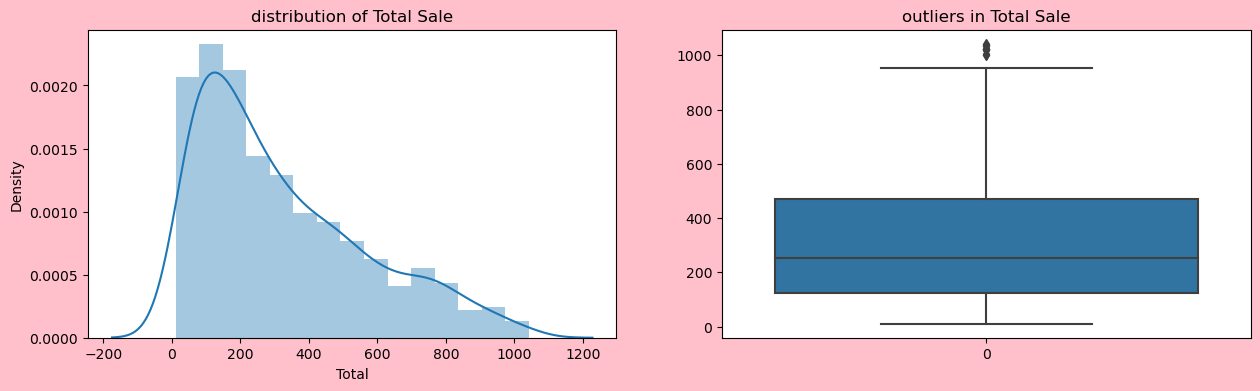

In [39]:
plt.figure(figsize=(15,4),facecolor="pink")
plt.subplot(1,2,1)
sns.distplot(df["Total"])
plt.title("distribution of Total Sale")
plt.subplot(1,2,2)
sns.boxplot(df["Total"])
plt.title("outliers in Total Sale");




**observations**
- First of all this distplot showing as right skew.
- Most of the customers visited to the company and got the product related amount around $10 to $200.
- There were very few customers who bought the expensive products.

- Boxplot showing outliers in the total column
- It represent majority of customers bought the product near around $100 to $500.
- Very few customers bought the the expensive products as clearly show in the boxplot as outliers.

# Total and avg sale of the company

In [40]:
df["Total"].agg(["mean","sum"])

mean       322.966749
sum     322966.749000
Name: Total, dtype: float64

# since the some products are expensive means they are considered as outliers so we find median since the above avg sale does give the genuine insight 

In [41]:
df["Total"].median()

253.848

**observation**
- Total sale of the company is approx 322966 dollar 
- Average sale of the company is approx 322 dollar

# Which City is More Crowded

In [42]:
df['City'].value_counts()

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

Text(0.5, 1.0, 'crowded city')

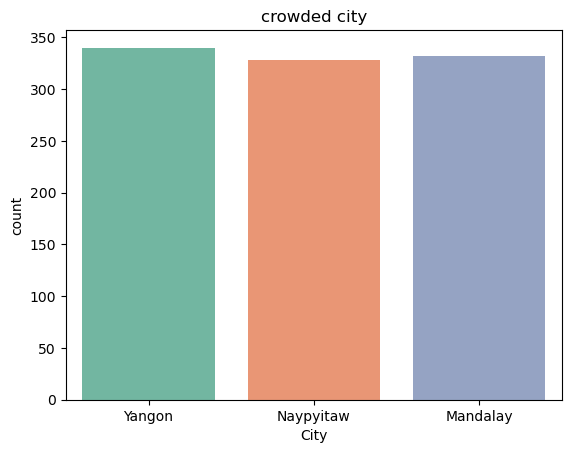

In [43]:
sns.countplot(x="City",data=df,palette="Set2")
plt.title("crowded city")

**Observations**
- Though the crowded city was yangon but hot selling city found to be Naypitaw
- There is not much significant differeence between three supermarts in each city but still the city    name Naypitaw is found to  be hot selling city 
    

# Total and average sale of each City 

Text(0.5, 1.0, 'Total sale of each City')

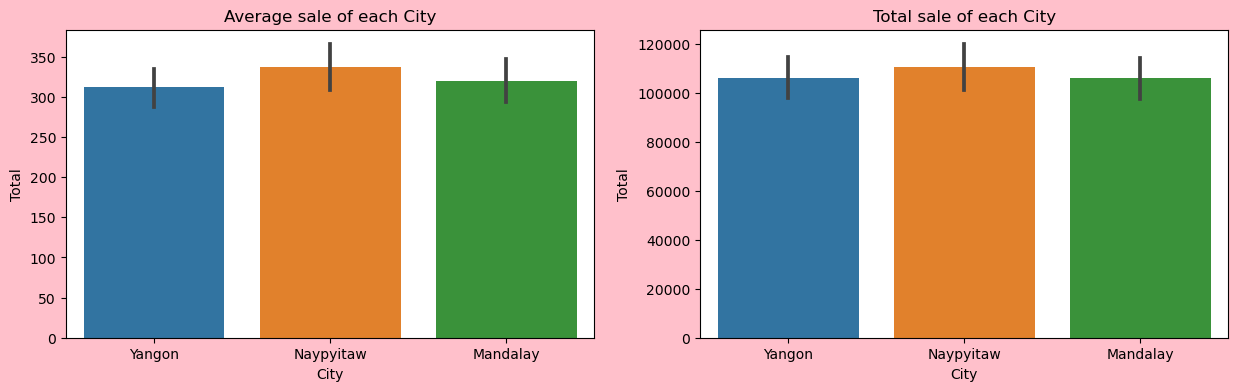

In [44]:
plt.figure(figsize=(15,4),facecolor="pink")
plt.subplot(1,2,1)
sns.barplot(x="City",y="Total",data=df)
plt.title("Average sale of each City")
plt.subplot(1,2,2)
sns.barplot(x="City",y="Total",data=df,estimator=sum)
plt.title("Total sale of each City")





**observations**
- Here we can see Naypyitaw city is the highest average sale but it does not show too much difference 
  as compared to yangon and mandalay.
- Also Naypyitaw city is the highest sale and again does not show too massive difference among other
  cities.
- Almost total sales and average sale is identical in among the cities but we can say hot selling city
  is Naypyitaw according to the results.

In [45]:
df.head(5)

City Customer type  Gender            Product line  Unit price  \
0     Yangon        Member  Female       Health and beauty       74.69   
1  Naypyitaw        Normal  Female  Electronic accessories       15.28   
2     Yangon        Normal    Male      Home and lifestyle       46.33   
3     Yangon        Member    Male       Health and beauty       58.22   
4     Yangon        Normal    Male       Sports and travel       86.31   

   Quantity     Total       Date                Time      Payment  Rating  \
0         7  548.9715 2019-01-05 2024-05-31 13:08:00      Ewallet     9.1   
1         5   80.2200 2019-03-08 2024-05-31 10:29:00         Cash     9.6   
2         7  340.5255 2019-03-03 2024-05-31 13:23:00  Credit card     7.4   
3         8  489.0480 2019-01-27 2024-05-31 20:33:00      Ewallet     8.4   
4         7  634.3785 2019-02-08 2024-05-31 10:37:00      Ewallet     5.3   

      month  day_name  day  year  Hour  
0   January  Saturday    5  2019    13  
1     March    Friday    8  2019    10  
2     March    Sunday    3  2019    13  
3   January    Sunday   27  2019    20  
4  February    Friday    8  2019    10

# insights

In [46]:
df.groupby('City')['Product line'].value_counts().to_frame()

count
City      Product line                 
Mandalay  Sports and travel          62
          Fashion accessories        62
          Electronic accessories     55
          Health and beauty          53
          Home and lifestyle         50
          Food and beverages         50
Naypyitaw Food and beverages         66
          Fashion accessories        65
          Electronic accessories     55
          Health and beauty          52
          Home and lifestyle         45
          Sports and travel          45
Yangon    Home and lifestyle         65
          Electronic accessories     60
          Sports and travel          59
          Food and beverages         58
          Fashion accessories        51
          Health and beauty          47

**observations**
- Althogh there is no much significant difference  between each city product wise but still we can
  observe **Naypyitaw** is found to be hot selling city




## Root cause analysis of Hot selling City




## Taking factor customer type 


<Axes: xlabel='City', ylabel='count'>

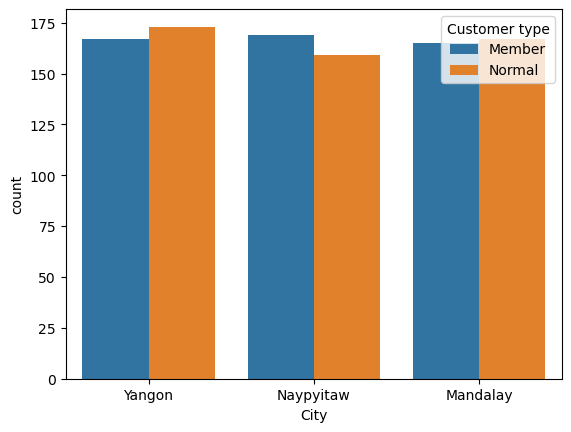

In [47]:
sns.countplot(x="City",data=df,hue="Customer type")

**observations** 
- Although i tried to find the insights while using customer type rather membership customers are       spending more or without membership but it couldn't help me out why Naypyitaw is hot selling city     because there are minor differences among the cities 

# Taking Factor Rating

<Axes: xlabel='City', ylabel='Rating'>

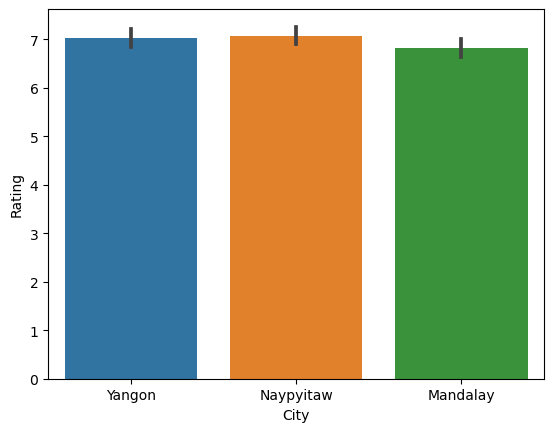

In [48]:
sns.barplot(x="City",y="Rating",data=df)

**observations**
- Although i tried to find the insights while using RATING whether customer give above average rating   to Naypyitaw but it doesn't like that all the cities have same ratings and also couldn't help to       find why Naypyitaw is the hot selling city 

# Taking Factor Unit Price of the Products

In [49]:
df[df["Unit price"]==df["Unit price"].max()]

City Customer type Gender       Product line  Unit price  Quantity  \
122   Mandalay        Member   Male  Sports and travel       99.96         9   
983  Naypyitaw        Normal   Male  Health and beauty       99.96         7   

       Total       Date                Time      Payment  Rating    month  \
122  944.622 2019-03-09 2024-05-31 17:26:00  Credit card     4.2    March   
983  734.706 2019-01-23 2024-05-31 10:33:00         Cash     6.1  January   

      day_name  day  year  Hour  
122   Saturday    9  2019    17  
983  Wednesday   23  2019    10

**observations**
- There is not a specific cause behind the hot selling branch / city this could be due to natural       factor as we see the maximum unit price is belongs to Mandalay and Naypyitaw or both

# Find the Highest sale in naypyitaw  on any day

In [50]:
df1=df[df['City']=='Naypyitaw']['Total'].max()
df1

1042.65

In [51]:
df[df['Total']==df1]

City Customer type  Gender         Product line  Unit price  \
350  Naypyitaw        Member  Female  Fashion accessories        99.3   

     Quantity    Total       Date                Time      Payment  Rating  \
350        10  1042.65 2019-02-15 2024-05-31 14:53:00  Credit card     6.6   

        month day_name  day  year  Hour  
350  February   Friday   15  2019    14

**observations**
- here we can see the highest sale in Naypyitaw is on Friday and the total sale is to be done of $1043   approx
- Product is Fashion accessories bought by Female Membership customer via using Credit card

## Find the lowest sale in naypyitaw  on any day

In [52]:
df_n=df[df["City"]=="Naypyitaw"] 
df_n[df_n["Total"]==df_n["Total"].min()]

City Customer type Gender       Product line  Unit price  Quantity  \
822  Naypyitaw        Member   Male  Sports and travel       10.17         1   

       Total       Date                Time Payment  Rating     month  \
822  10.6785 2019-02-07 2024-05-31 14:15:00    Cash     5.9  February   

     day_name  day  year  Hour  
822  Thursday    7  2019    14

**observations**
- here we can see the lowest sale in Naypyitaw is on Thursday and the total sale is to be done of $11 approx
- Product is Sports and Travel bought by Male Membership customer via Cash

# Find the highest business revenue month of the company...........

In [53]:
df.groupby(['month'])['Total'].sum().sort_values(ascending=False)

month
January     116291.868
March       109455.507
February     97219.374
Name: Total, dtype: float64

C:\Users\acer\AppData\Local\Temp\ipykernel_13324\2690976534.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="month",y="Total",data=df,estimator=sum,palette="Set2",ci=None);


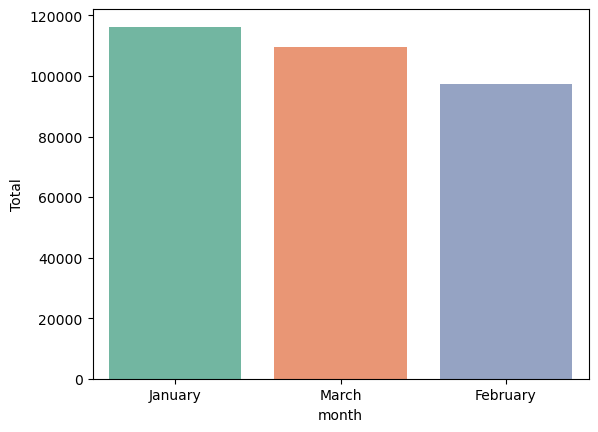

In [54]:
sns.barplot(x="month",y="Total",data=df,estimator=sum,palette="Set2",ci=None);

**observations**
- January is the highest business revenue month of the company as we show above by using barplot         concept
- Then March is the second highest business revenue month and last is February month to generate the     business revenue of the company

# How much Percent business revenue generated in each month of the company

Text(0.5, 1.0, 'Hot selling Month of the company ')

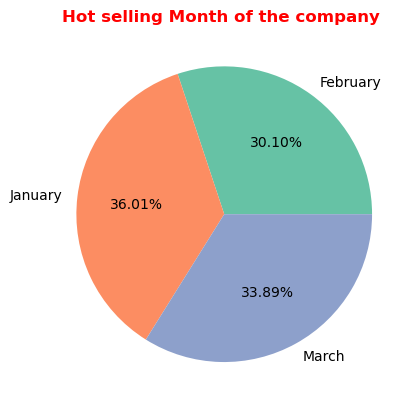

In [55]:
plt.pie(df.groupby(["month"])["Total"].agg(["sum"])["sum"],labels=df.groupby(["month"])["Total"].agg(["sum"]).index,autopct="%.2f%%",colors=sns.color_palette('Set2'))
plt.title("Hot selling Month of the company ",fontsize=12,color="Red",fontweight="bold")

**Observations**
- Company has generated the highest business month in January month near about 36%
- then March has 34% and then February has 30% 

# We can club the bar and pie together to show better readability...

Text(0.5, 1.0, 'Hot selling Month of the company ')

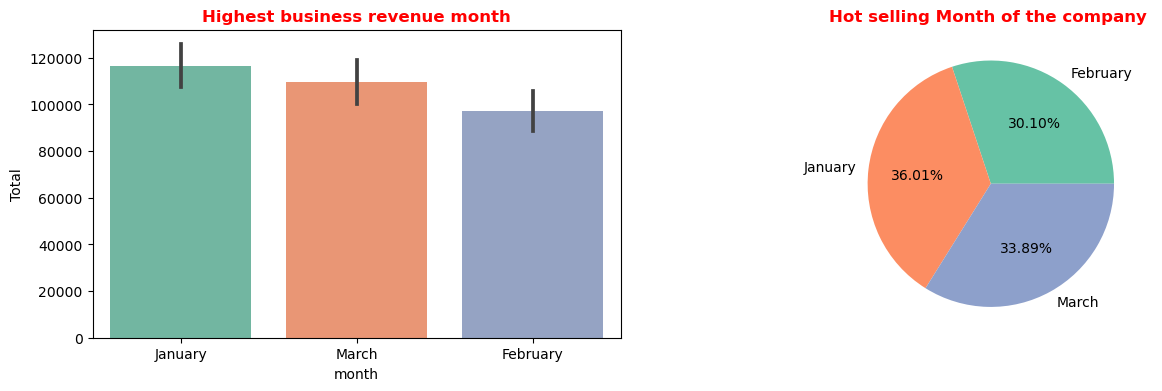

In [56]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.barplot(x="month",y="Total",data=df,estimator=sum,palette="Set2")
plt.title("Highest business revenue month",fontsize=12,color="Red",fontweight="bold")
plt.subplot(1,2,2)
plt.pie(df.groupby(["month"])["Total"].agg(["sum"])["sum"],labels=df.groupby(["month"])["Total"].agg(["sum"]).index,autopct="%.2f%%",colors=sns.color_palette('Set2'))
plt.title("Hot selling Month of the company ",fontsize=12,color="Red",fontweight="bold")




# Find the highest business revenue of month of each city and show the pattern

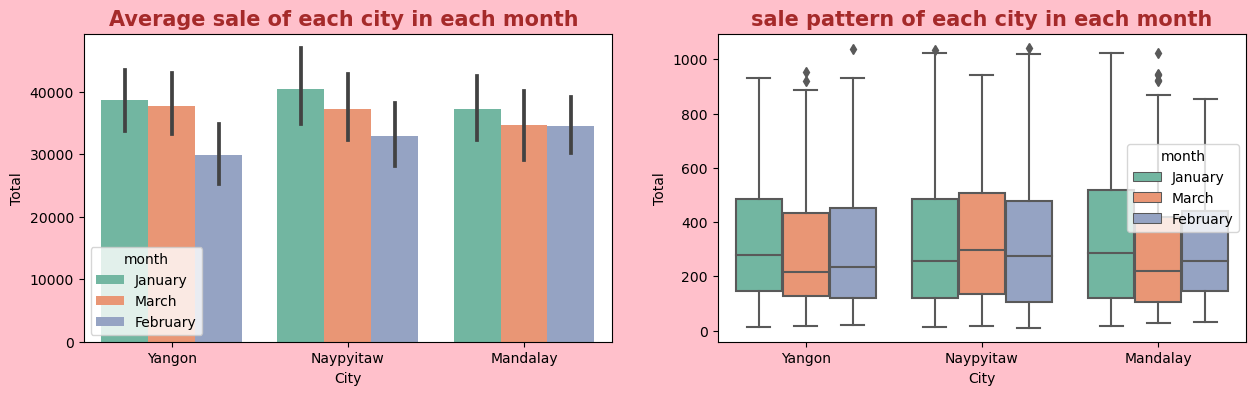

In [57]:
plt.figure(figsize=(15,4),facecolor="pink")
plt.subplot(1,2,1)
sns.barplot(x="City",y="Total",data=df,estimator=sum,palette="Set2",hue="month");
plt.title("Average sale of each city in each month ",fontsize=15,color="brown",fontweight="bold")
plt.subplot(1,2,2)
sns.boxplot(x="City",y="Total",data=df,palette="Set2",hue="month");
plt.title("sale pattern of each city in each month",fontsize=15,color="brown",fontweight="bold");

**Observations**
- January becomes the hot selling month in each cities as Average sale of january is higher than february
  and March in each city(Yangon, Naypyitaw, Mandalay)
- Sale pattern showing some outliers as customer bought the expensive products in march & February month in Yangon city
  and customers bought expensive products in January & February in Naypyitaw city and some customers bought expensive products
  in March month only in Mandalay city   
- Rest of the sale pattern of each city in each month does not show any outliers...so majority of the customers bought the products near around $150 to $500

## Sale trend of company over the three months

C:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x500 with 0 Axes>

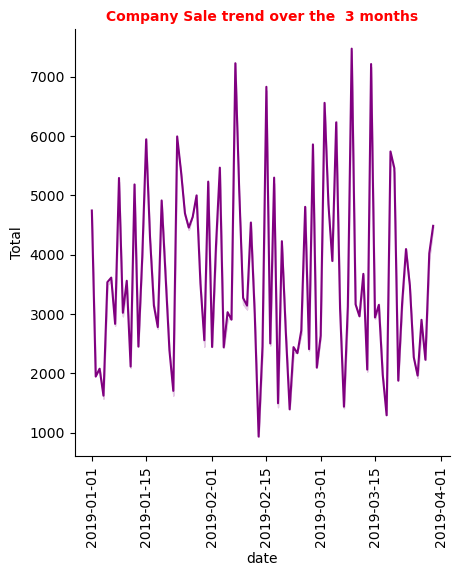

In [58]:
plt.figure(figsize=(15,5))
sns.relplot(x="Date",y="Total",data=df,kind="line",color="purple",estimator=sum,ci=False)
plt.xlabel("date")
plt.title(" Company Sale trend over the  3 months ",fontsize=10,color="red",fontweight="bold")
plt.xticks(rotation=90);


C:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x500 with 0 Axes>

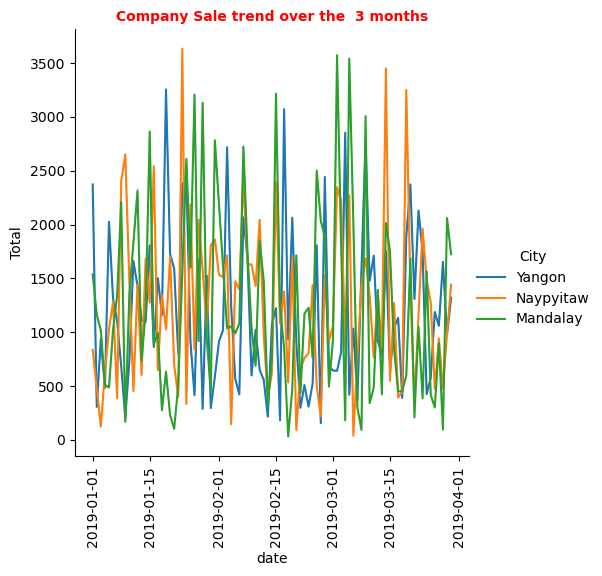

In [59]:
plt.figure(figsize=(15,5))
sns.relplot(x="Date",y="Total",data=df,kind="line",color="purple",estimator=sum,ci=False,hue='City')
plt.xlabel("date")
plt.title(" Company Sale trend over the  3 months ",fontsize=10,color="red",fontweight="bold")
plt.xticks(rotation=90);


**Observations**
- This lineplot seems very massy and couldn't find any insights from it.
- We have to find insights by using each lineplot for each city.

# Sale trend of each city

In [60]:
df_n=df[df["City"]=="Naypyitaw"]
df_y=df[df["City"]=="Yangon"]
df_m=df[df["City"]=="Mandalay"]

In [61]:
cities=[df_y,df_n,df_m]

C:\Users\acer\AppData\Local\Temp\ipykernel_13324\3788510133.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x="Date",y="Total",data=city,estimator=sum,ci=False)
C:\Users\acer\AppData\Local\Temp\ipykernel_13324\3788510133.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x="Date",y="Total",data=city,estimator=sum,ci=False)
C:\Users\acer\AppData\Local\Temp\ipykernel_13324\3788510133.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x="Date",y="Total",data=city,estimator=sum,ci=False)


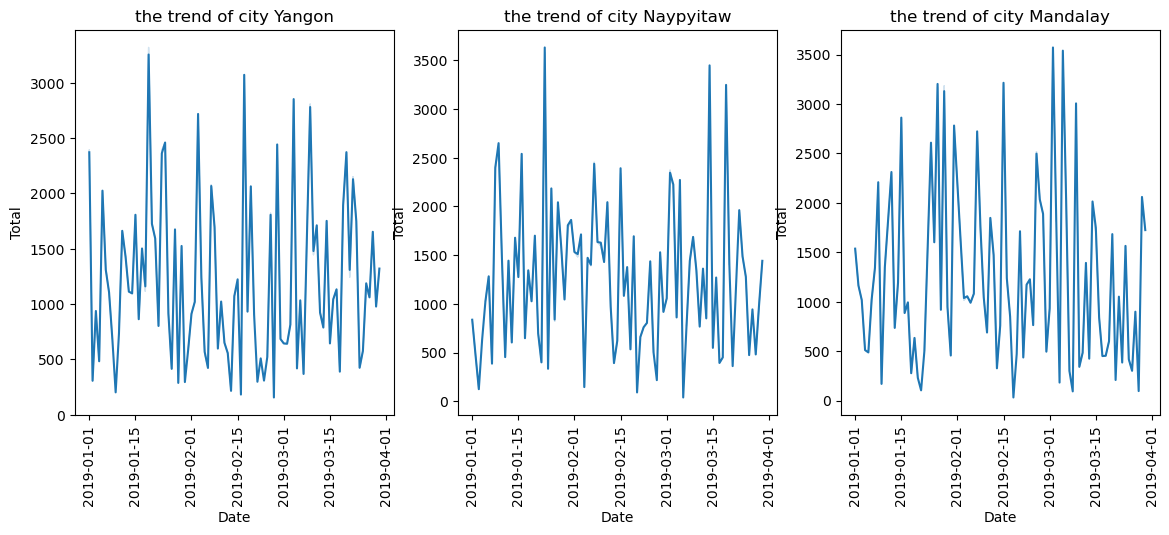

In [62]:
city_name=["Yangon", 'Naypyitaw', 'Mandalay']
pos=1
plt.figure(figsize=(14,5))
for city in cities:
    #print(city)
    plt.subplot(1,3,pos)
    sns.lineplot(x="Date",y="Total",data=city,estimator=sum,ci=False)
    plt.title(f"the trend of city {city_name[pos-1]}")
    plt.xticks(rotation=90)
    pos=pos+1


**Observations**
- Sales Trend is to be going Ups and downs in all three months in each of the cities.

 ### Sale  trend of each branch/City at each month

C:\Users\acer\AppData\Local\Temp\ipykernel_13324\1599052365.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x="Date",y="Total",data=city,estimator=sum,ci=False,hue='month')
C:\Users\acer\AppData\Local\Temp\ipykernel_13324\1599052365.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x="Date",y="Total",data=city,estimator=sum,ci=False,hue='month')
C:\Users\acer\AppData\Local\Temp\ipykernel_13324\1599052365.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x="Date",y="Total",data=city,estimator=sum,ci=False,hue='month')


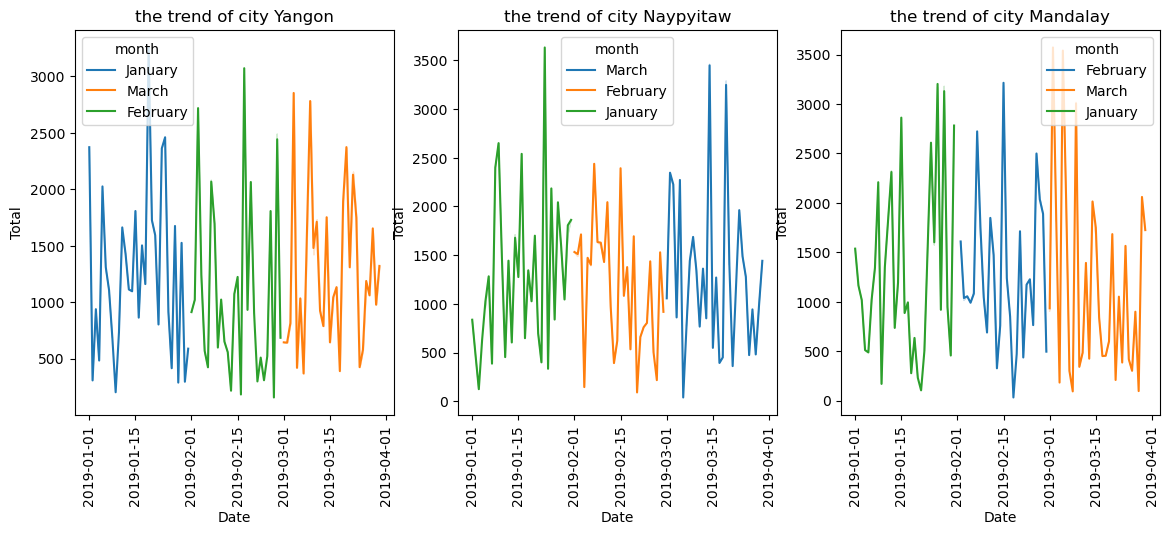

In [63]:
city_name=["Yangon", 'Naypyitaw', 'Mandalay']
pos=1
plt.figure(figsize=(14,5))
for city in cities:
    #print(city)
    plt.subplot(1,3,pos)
    sns.lineplot(x="Date",y="Total",data=city,estimator=sum,ci=False,hue='month')
    plt.title(f"the trend of city {city_name[pos-1]}")
    plt.xticks(rotation=90)
    pos=pos+1


**Observations**
- Similarly,Sales Trend is to be going Ups and downs in all three months in each of the cities.
- Here,Blue line plot showing the trend of January and Orange line plot showing the trend of March and
  Green line plot showing the trend of February in Yangon City.
- Here,Green line plot showing the trend of January and Orange line plot showing the trend of February and
  Blue line plot showing the trend of March in Naypyitaw City.
- Here,Blue line plot showing the trend of February and Orange line plot showing the trend of March and
  Green line plot showing the trend of January in Mandalay City.

- Peakness of sale trend is to be done in january month in Yangon city.
- Peakness of sale trend is to be done in january month in Naypyitaw city.
- Peakness of sale trend is to be done in March month in Mandalay city

# Hot sellin day of the company

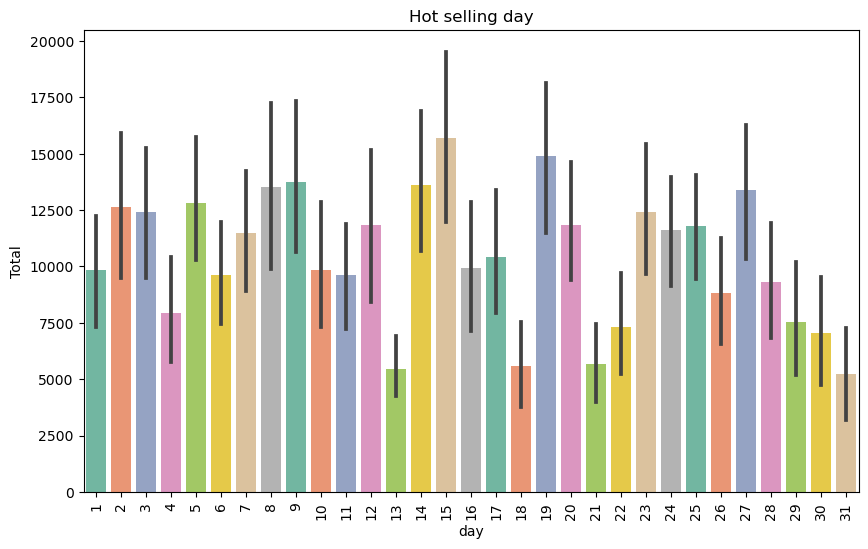

In [64]:
plt.figure(figsize=(10,6))
sns.barplot(x="day",y="Total",data=df,estimator=sum,palette="Set2")
plt.xticks(rotation=90)
plt.title("Hot selling day");

**Observations**
- 15th Day is to be considered as the Hot selling day of the company.
- It could be 15th of (March,January,February).

# Hot selling day of each city

C:\Users\acer\AppData\Local\Temp\ipykernel_13324\3814292227.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x="day",y="Total",data=city,estimator=sum,ci=False)
C:\Users\acer\AppData\Local\Temp\ipykernel_13324\3814292227.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x="day",y="Total",data=city,estimator=sum,ci=False)
C:\Users\acer\AppData\Local\Temp\ipykernel_13324\3814292227.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x="day",y="Total",data=city,estimator=sum,ci=False)


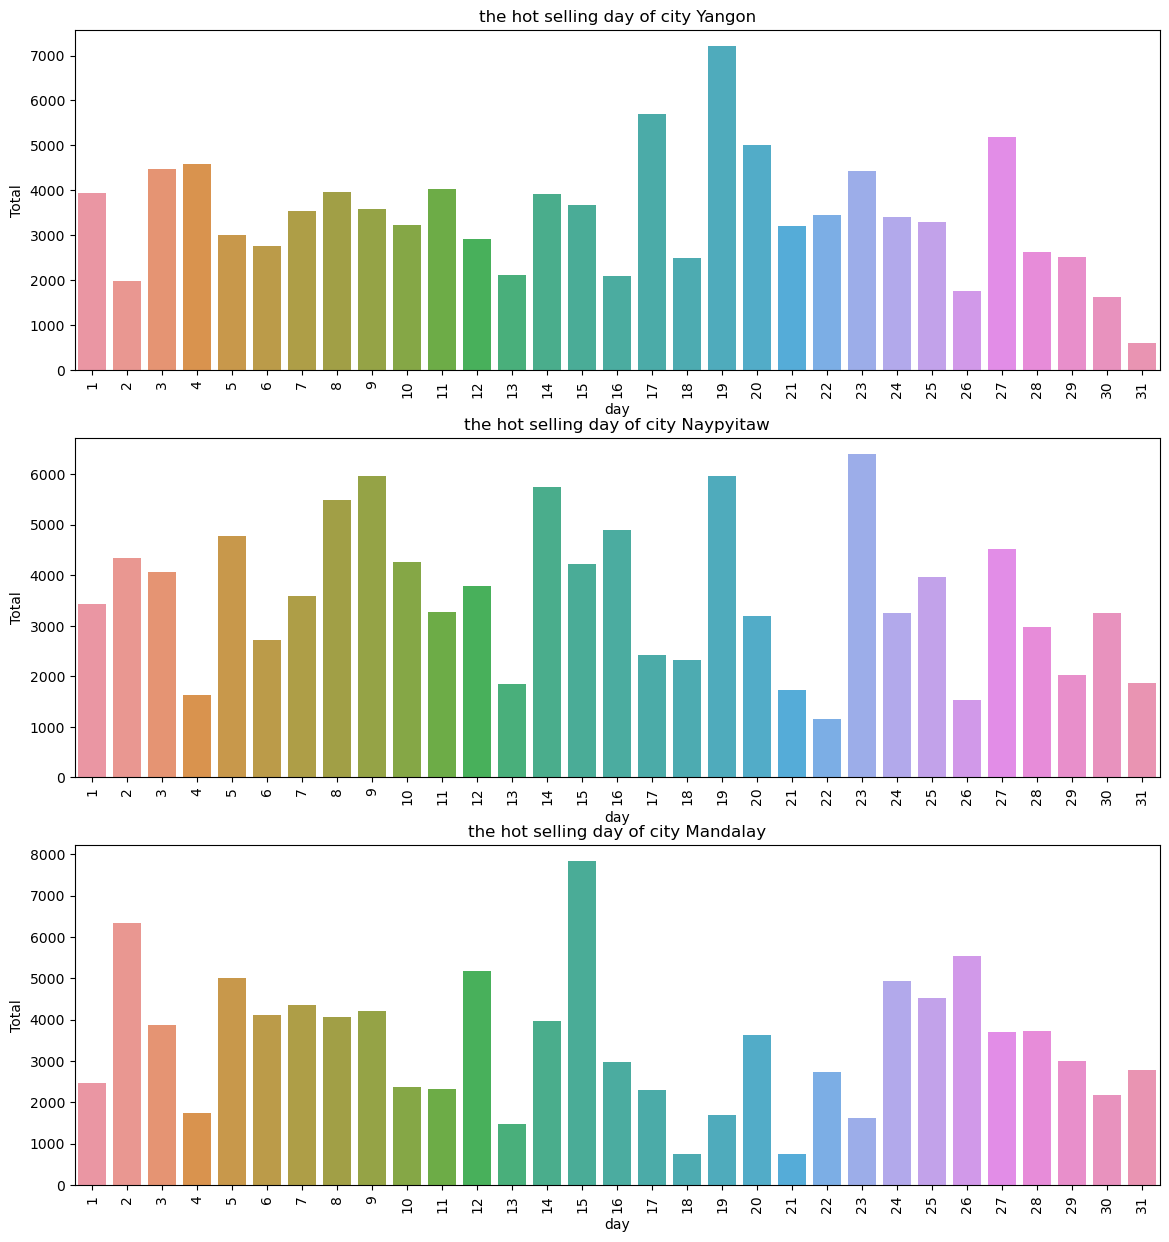

In [65]:
city_name=["Yangon", 'Naypyitaw', 'Mandalay']
pos=1
plt.figure(figsize=(14,15))
for city in cities:
    #print(city)
    plt.subplot(3,1,pos)
    sns.barplot(x="day",y="Total",data=city,estimator=sum,ci=False)
    plt.title(f"the hot selling day of city {city_name[pos-1]}")
    plt.xticks(rotation=90)
    pos=pos+1




**Observations**
- 19th is hot selling day of Yangon city.
- 23rd is the hot selling day of Naypyitaw city.
- 15th is the hot selling day of Mandalay city.

# Find the total weekday and weekend sale

In [66]:
df['weekday/weekend']=df['day_name'].apply(lambda x: "weekend "if x=="Saturday" or x=="Sunday" else "weekday")

In [67]:
df.head(2)

City Customer type  Gender            Product line  Unit price  \
0     Yangon        Member  Female       Health and beauty       74.69   
1  Naypyitaw        Normal  Female  Electronic accessories       15.28   

   Quantity     Total       Date                Time  Payment  Rating  \
0         7  548.9715 2019-01-05 2024-05-31 13:08:00  Ewallet     9.1   
1         5   80.2200 2019-03-08 2024-05-31 10:29:00     Cash     9.6   

     month  day_name  day  year  Hour weekday/weekend  
0  January  Saturday    5  2019    13        weekend   
1    March    Friday    8  2019    10         weekday

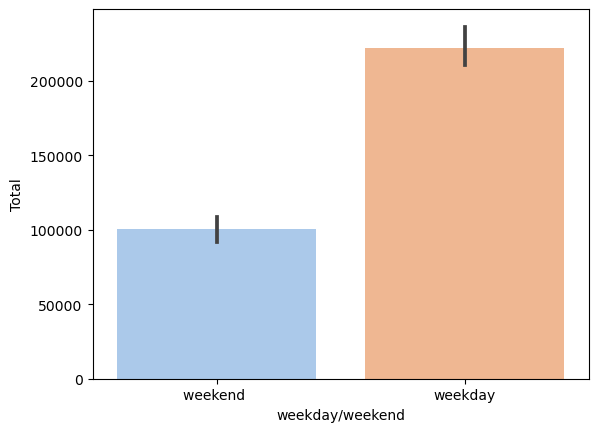

In [68]:
sns.barplot(x="weekday/weekend",y="Total",data=df,estimator=sum,palette="pastel");

**Observations**
- Total weekdays sales is higher than the total weekend sales of the company as we saw in above bar chart
- here we can provide some offers to our customers on weekends to increment in the sales of the company

In [69]:
df.groupby('weekday/weekend')['Total'].sum()

weekday/weekend
weekday     222388.047
weekend     100578.702
Name: Total, dtype: float64

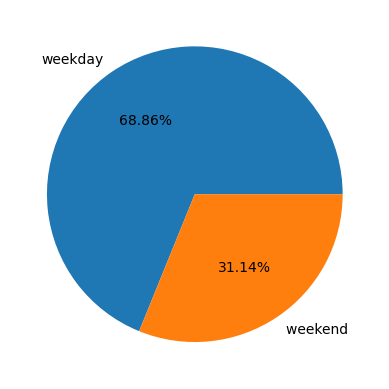

In [70]:
plt.pie(df.groupby(["weekday/weekend"])["Total"].sum().values,labels=df.groupby(["weekday/weekend"])["Total"].sum().index,autopct="%.2f%%");



**Observations**
- we can see the percentage of weekdays and weekend sales of the company by using the help of pie chart

<Axes: xlabel='City', ylabel='Total'>

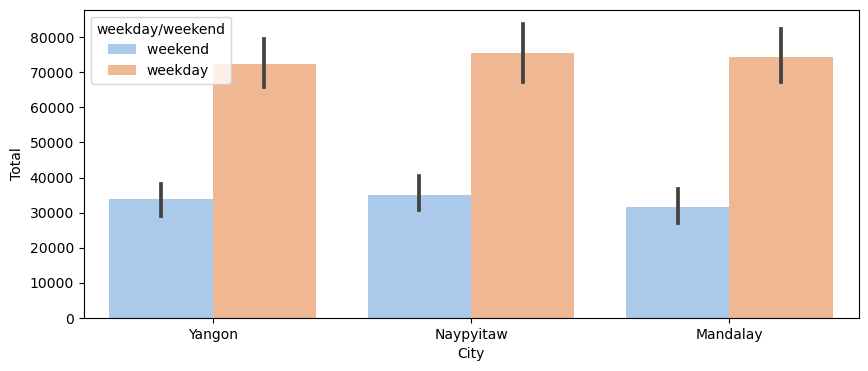

In [71]:
plt.figure(figsize=(10,4))
sns.barplot(x="City",y="Total",data=df,estimator=sum,palette="pastel",hue="weekday/weekend")




**Observations**
- Here is the weekdays and weekend sales of the company city wise.
- All the three cities has maximum sales in weekdays rather than weekend.

## weekday and weekend sale of each branch/City of each month

In [72]:
df.groupby(["City","month","weekday/weekend"])["Total"].agg(["sum"])

sum
City      month    weekday/weekend            
Mandalay  February weekday          25964.4525
                   weekend           8459.8185
          January  weekday          27634.8870
                   weekend           9541.1715
          March    weekday          20898.5805
                   weekend          13698.7620
Naypyitaw February weekday          21950.5020
                   weekend          10984.4805
          January  weekday          30470.0550
                   weekend           9964.6260
          March    weekday          23041.4310
                   weekend          14157.6120
Yangon    February weekday          20417.2395
                   weekend           9442.8810
          January  weekday          25736.4870
                   weekend          12944.6415
          March    weekday          26274.4125
                   weekend          11384.7090

# Find the most populated product of the company......

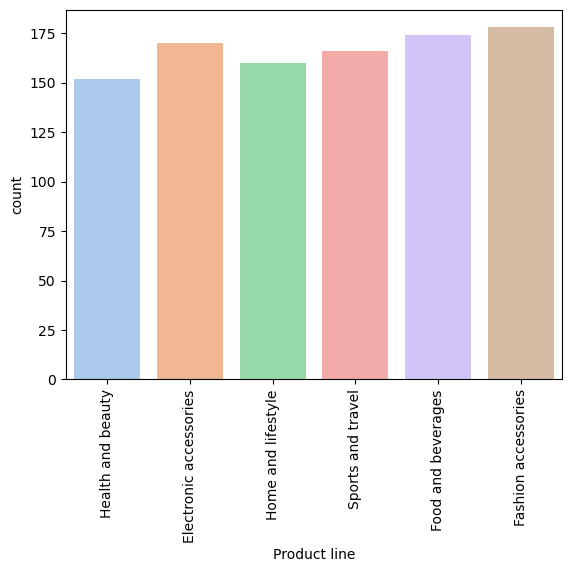

In [73]:
sns.countplot(x="Product line",data=df,palette="pastel")
plt.xticks(rotation=90);

**Observations**
- Fashion Accessories is the most demanding product of the company as it's sales is going to be higher than other products 

# Find the most Populated Product of the each city

(array([0, 1, 2]),
 [Text(0, 0, 'Yangon'), Text(1, 0, 'Naypyitaw'), Text(2, 0, 'Mandalay')])

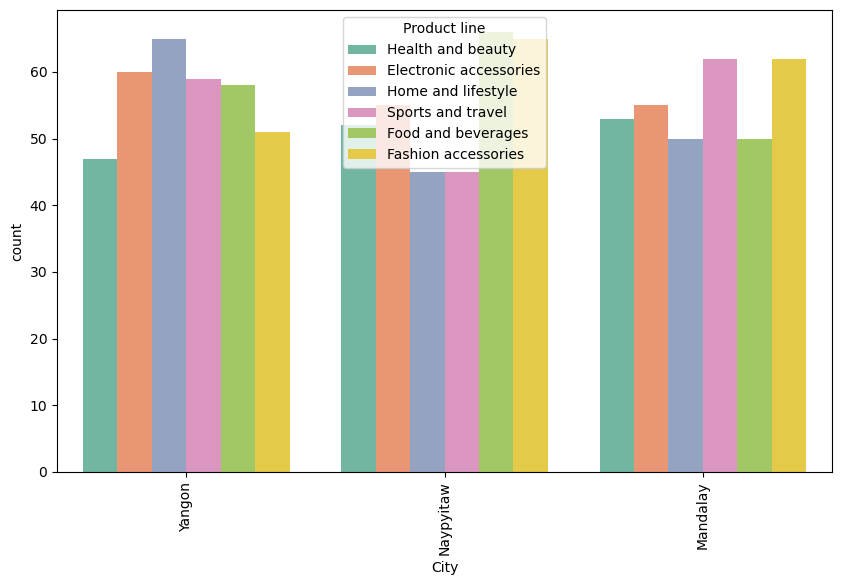

In [74]:
plt.figure(figsize=(10,6))
sns.countplot(x='City',data=df,hue='Product line',palette='Set2')
plt.xticks(rotation=90)

**Observations**
- Home and Lifestyle is the most popular product of Yangon city.
- Food and Beverages is the most popular product of Naypyitaw city.
- Sports & Travel and Fashion Accessories is the most popular product of Mandalay city.

# Find the most revenue generating product of the company of each city

C:\Users\acer\AppData\Local\Temp\ipykernel_13324\3088851014.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="City",y="Total",estimator=sum,data=df,palette="Set2",hue="Product line",ci=None)


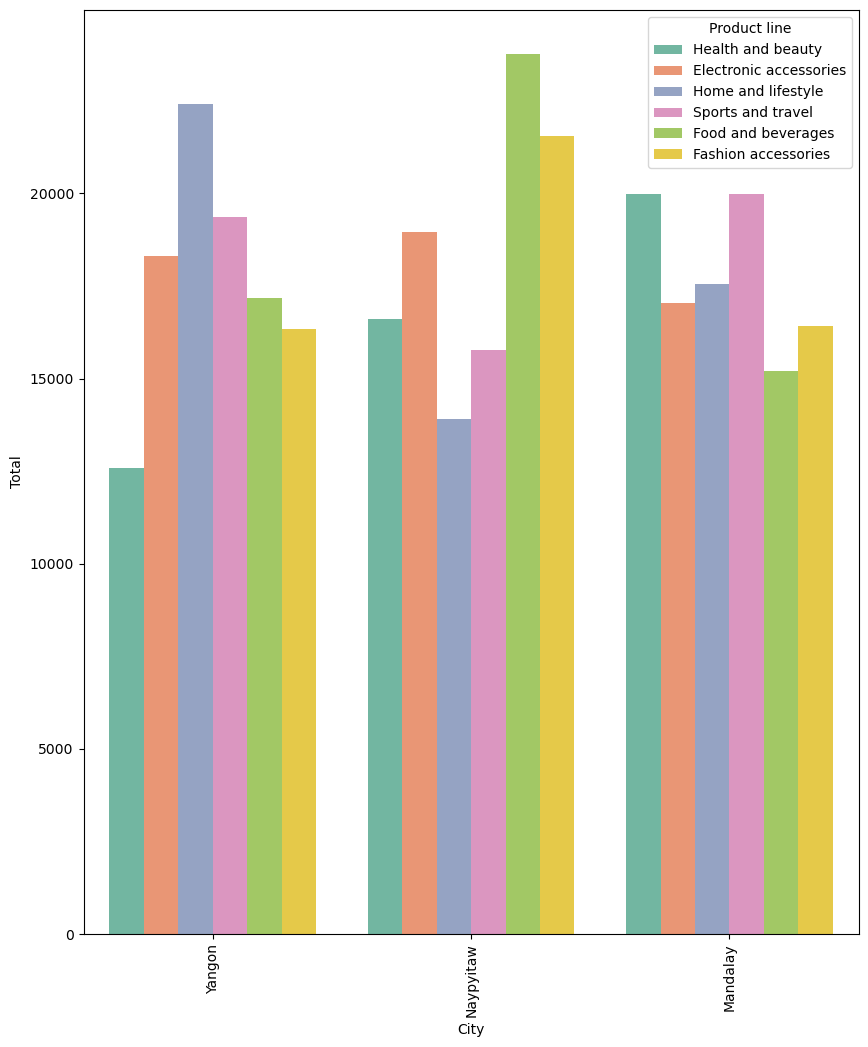

In [75]:
plt.figure(figsize=(10,12))
sns.barplot(x="City",y="Total",estimator=sum,data=df,palette="Set2",hue="Product line",ci=None)
plt.xticks(rotation=90);


**Observations**
- Home and lifestyles is the most revenue generating product in Yangon city.
- Food and Beverages is the most revenue generating product in Naypyitaw city.
- Health & Beauty and Sports & Travel is the most revenue generating product in Mandalay city.

# Find the city and month wise of each products

In [76]:
s=df.groupby(["City","month"])["Product line"].value_counts()
s

City       month     Product line          
Mandalay   February  Fashion accessories       24
                     Sports and travel         19
                     Electronic accessories    19
                     Food and beverages        17
                     Health and beauty         16
                     Home and lifestyle        14
           January   Sports and travel         23
                     Fashion accessories       21
                     Food and beverages        19
                     Electronic accessories    18
                     Health and beauty         16
                     Home and lifestyle        14
           March     Home and lifestyle        22
                     Health and beauty         21
                     Sports and travel         20
                     Electronic accessories    18
                     Fashion accessories       17
                     Food and beverages        14
Naypyitaw  February  Food and beverages        24
      

# Find the total no of customers

In [77]:
df.head(5)

City Customer type  Gender            Product line  Unit price  \
0     Yangon        Member  Female       Health and beauty       74.69   
1  Naypyitaw        Normal  Female  Electronic accessories       15.28   
2     Yangon        Normal    Male      Home and lifestyle       46.33   
3     Yangon        Member    Male       Health and beauty       58.22   
4     Yangon        Normal    Male       Sports and travel       86.31   

   Quantity     Total       Date                Time      Payment  Rating  \
0         7  548.9715 2019-01-05 2024-05-31 13:08:00      Ewallet     9.1   
1         5   80.2200 2019-03-08 2024-05-31 10:29:00         Cash     9.6   
2         7  340.5255 2019-03-03 2024-05-31 13:23:00  Credit card     7.4   
3         8  489.0480 2019-01-27 2024-05-31 20:33:00      Ewallet     8.4   
4         7  634.3785 2019-02-08 2024-05-31 10:37:00      Ewallet     5.3   

      month  day_name  day  year  Hour weekday/weekend  
0   January  Saturday    5  2019    13        weekend   
1     March    Friday    8  2019    10         weekday  
2     March    Sunday    3  2019    13        weekend   
3   January    Sunday   27  2019    20        weekend   
4  February    Friday    8  2019    10         weekday

In [78]:
df['Gender'].count()

1000

total customers :  1000


<Axes: xlabel='Gender', ylabel='count'>

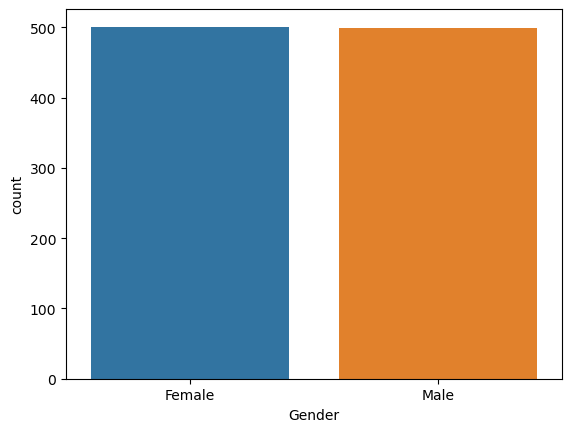

In [79]:
print("total customers : ",df["Gender"].count())
sns.countplot(x="Gender",data=df)

**Observations**
- There are almost same male customers and female customers in all the cities.

# Total male and female customers in each city

<Axes: xlabel='City', ylabel='count'>

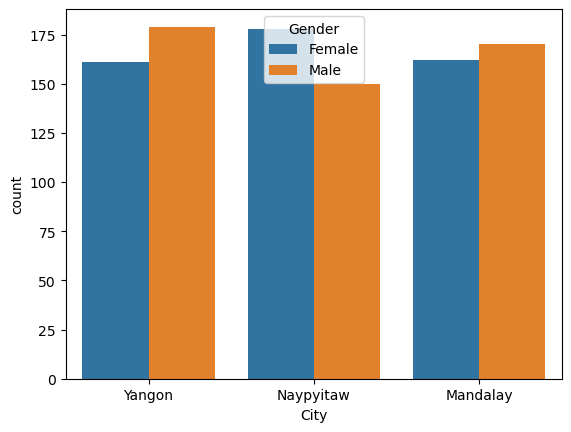

In [80]:
sns.countplot(x="City",data=df,hue="Gender")


**Observations**
- Total male customers is greater than female customers in Yangon city
- Total female customers is greater than male customers in Naypyitaw city
- Total male customers is greater than female customers in Mandalay city

# which type of customers visiting most

<Axes: xlabel='City', ylabel='count'>

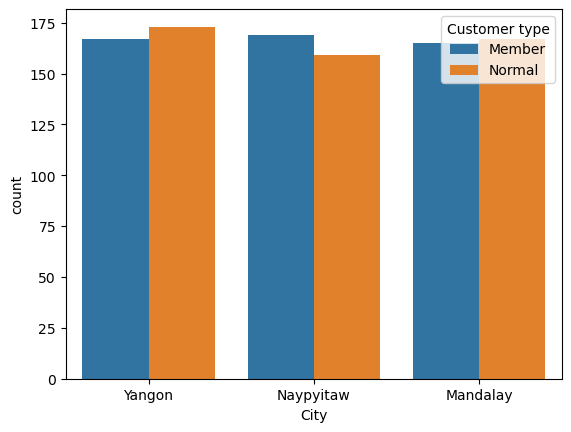

In [81]:
sns.countplot(x="City",data=df,hue="Customer type")

**Observations**
- Without membership customers visiting most in Yangon city.
- Without membership customers visiting most in Mandalay city.
- Membership customers visiting most in Naypyitaw city.

# Which type of customers generate revenue most

<Axes: xlabel='City', ylabel='Total'>

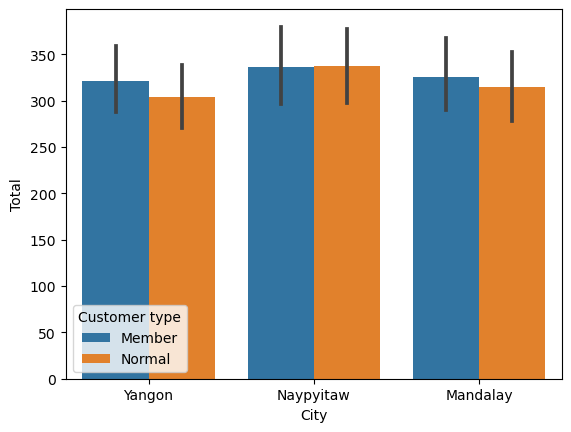

In [82]:
sns.barplot(x="City",y="Total",data=df,hue="Customer type")

**Observations**
- Membership customers has generating the revenue most in Yangon and Mandalay city.
- whereas both membership and without membership customers are generating the revenue almost same in Naypyitaw city

In [83]:
df.head(5)

City Customer type  Gender            Product line  Unit price  \
0     Yangon        Member  Female       Health and beauty       74.69   
1  Naypyitaw        Normal  Female  Electronic accessories       15.28   
2     Yangon        Normal    Male      Home and lifestyle       46.33   
3     Yangon        Member    Male       Health and beauty       58.22   
4     Yangon        Normal    Male       Sports and travel       86.31   

   Quantity     Total       Date                Time      Payment  Rating  \
0         7  548.9715 2019-01-05 2024-05-31 13:08:00      Ewallet     9.1   
1         5   80.2200 2019-03-08 2024-05-31 10:29:00         Cash     9.6   
2         7  340.5255 2019-03-03 2024-05-31 13:23:00  Credit card     7.4   
3         8  489.0480 2019-01-27 2024-05-31 20:33:00      Ewallet     8.4   
4         7  634.3785 2019-02-08 2024-05-31 10:37:00      Ewallet     5.3   

      month  day_name  day  year  Hour weekday/weekend  
0   January  Saturday    5  2019    13        weekend   
1     March    Friday    8  2019    10         weekday  
2     March    Sunday    3  2019    13        weekend   
3   January    Sunday   27  2019    20        weekend   
4  February    Friday    8  2019    10         weekday

# OF which payment type customers are more or less

In [84]:
df['Payment'].value_counts()

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

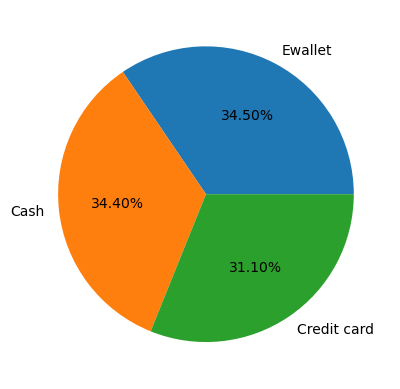

In [85]:
plt.pie(df["Payment"].value_counts().values,labels=df["Payment"].value_counts().index,autopct="%.2f%%");

**Observations**
- There is not much difference in E-wallet and cash payment mode as they show equally near about 34.5%
- whereas credit card mode of payment is much lesser than both of them which is 31.1%

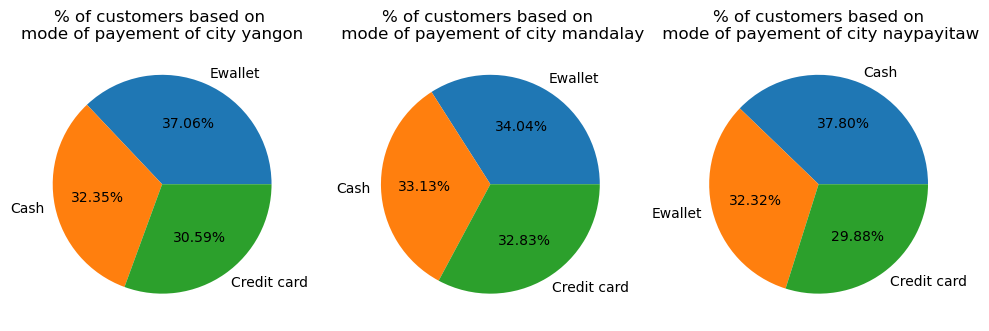

In [86]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.pie(df_y["Payment"].value_counts().values,labels=df_y["Payment"].value_counts().index,autopct="%.2f%%")
plt.title("% of customers based on \nmode of payement of city yangon")
plt.subplot(1,3,2)
plt.pie(df_m["Payment"].value_counts().values,labels=df_m["Payment"].value_counts().index,autopct="%.2f%%")
plt.title("% of customers based on \n mode of payement of city mandalay")
plt.subplot(1,3,3)
plt.pie(df_n["Payment"].value_counts().values,labels=df_n["Payment"].value_counts().index,autopct="%.2f%%")
plt.title("% of customers based on\n mode of payement of city naypayitaw");


**Observations**
- E wallet payment mode gets the highest percent of payment in Yangon city as well as Mandalay city.
- where as Cash mode of payment gets the highest percent in Naypyitaw city.

# Find the peak time of Customers visit at supermarket

C:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1700x900 with 0 Axes>

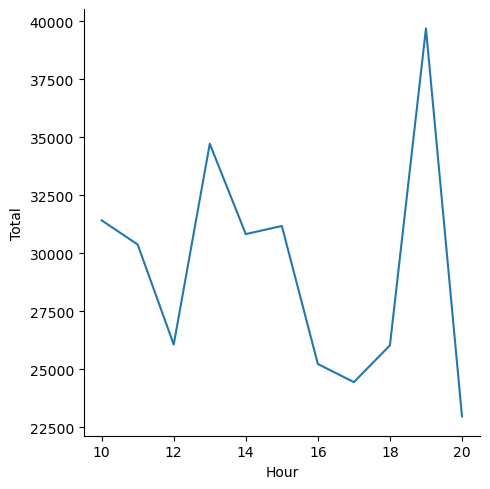

In [87]:
plt.figure(figsize=(17,9))
sns.relplot(x="Hour",y="Total",data=df,estimator=sum,kind="line",ci=None)

**Observations**
- As we observe according to the lineplot most of the customer visiting the supermarket near about 7 pm onwards
- and secondly near about 1 pm onwards 
- So we can maintain our stocks according the item sales at that peak time.
- and we observe according to the lineplot least of the customer visiting the store near about 5 pm.

# Peak time for each city

C:\Users\acer\AppData\Local\Temp\ipykernel_13324\2830939423.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x="Hour",y="Total",data=city,estimator=sum,ci=False)
C:\Users\acer\AppData\Local\Temp\ipykernel_13324\2830939423.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x="Hour",y="Total",data=city,estimator=sum,ci=False)
C:\Users\acer\AppData\Local\Temp\ipykernel_13324\2830939423.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x="Hour",y="Total",data=city,estimator=sum,ci=False)


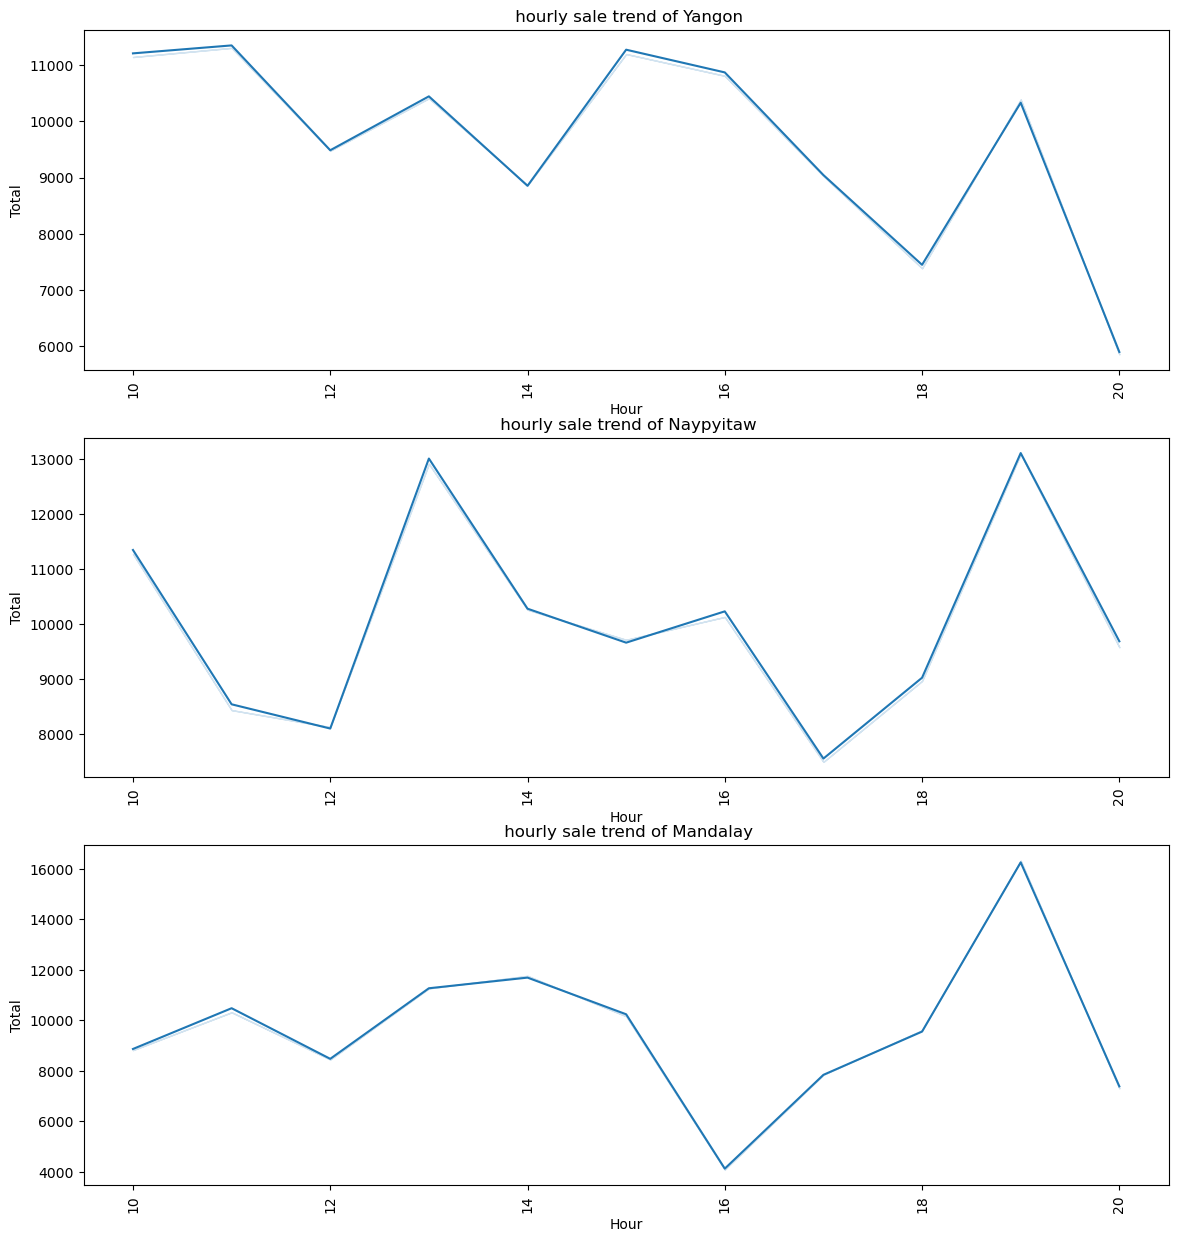

In [100]:
city_name=["Yangon", 'Naypyitaw', 'Mandalay']
pos=1
plt.figure(figsize=(14,15))
for city in cities:
    #print(city)
    plt.subplot(3,1,pos)
    sns.lineplot(x="Hour",y="Total",data=city,estimator=sum,ci=False)
    plt.title(f" hourly sale trend of {city_name[pos-1]}")
    plt.xticks(rotation=90)
    pos=pos+1


**Observations**
- 11 AM is the peak time of sales is to be done in yangon city.
- 1 PM and 7 PM is the peak time of sales in Naypyitaw city.
- 7 PM is the peak time of sales is to be done in Mandalay city.

- So we can maintain our stocks according to the item sales at their peak time.

# Hourly Sale trend of the each cities

C:\Users\acer\AppData\Local\Temp\ipykernel_13324\635339693.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x="Hour",y="Total",data=city,estimator=sum,ci=False,hue='Product line')
C:\Users\acer\AppData\Local\Temp\ipykernel_13324\635339693.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x="Hour",y="Total",data=city,estimator=sum,ci=False,hue='Product line')
C:\Users\acer\AppData\Local\Temp\ipykernel_13324\635339693.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x="Hour",y="Total",data=city,estimator=sum,ci=False,hue='Product line')


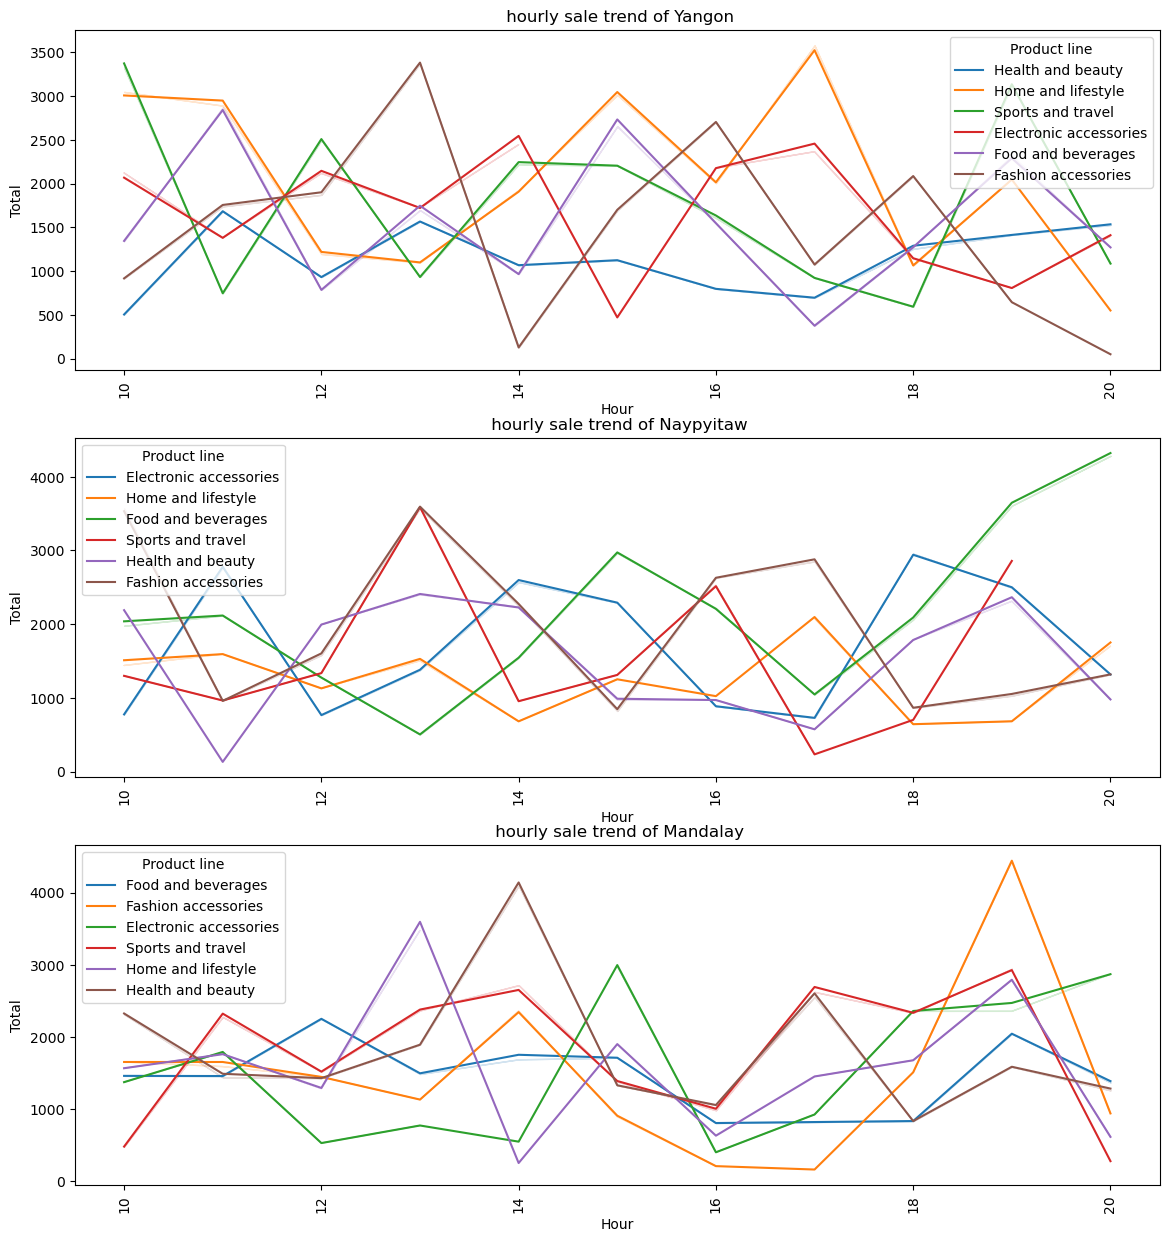

In [89]:
city_name=["Yangon", 'Naypyitaw', 'Mandalay']
pos=1
plt.figure(figsize=(14,15))
for city in cities:
    #print(city)
    plt.subplot(3,1,pos)
    sns.lineplot(x="Hour",y="Total",data=city,estimator=sum,ci=False,hue='Product line')
    plt.title(f" hourly sale trend of {city_name[pos-1]}")
    plt.xticks(rotation=90)
    pos=pos+1

**Observations**
- Hourly sales trend of Home & Lifestyle is higher than the other products in Yangon city at 5pm and 
  Fashion Accessories has the lowest sales at 8pm.
- Hourly sales trend of Food & Beverages is higher than the other products in Naypyitaw city at 8pm and 
  Health & Beauty has the lowest sales at 11am.
- Hourly sales trend of Fashion Accessories is higher than the other products in Mandalay city at 7pm and 
  Fashion Accessories has the lowest sales at 5pm.

# Rating

C:\Users\acer\AppData\Local\Temp\ipykernel_13324\2160066058.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rating'])


<Axes: xlabel='Rating', ylabel='Density'>

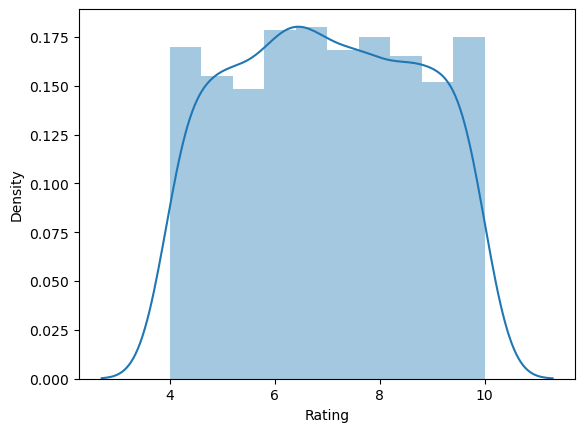

In [101]:
sns.distplot(df['Rating'])

**observations**
- With the help of distplot we can observe that Rating column does not have outliers.

# To check the outliers

<Axes: >

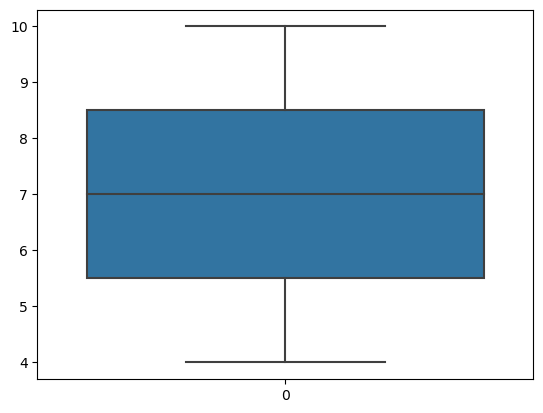

In [103]:
sns.boxplot(df['Rating'])

# Find Highest,lowest and average rating to the company

In [104]:
df["Rating"].agg(["max","min","mean"])

max     10.0000
min      4.0000
mean     6.9727
Name: Rating, dtype: float64

**Observations**
- Average Rating of the customer is near about 7 it means customers are highly satisfied with the products and services provided by the company

# How many customers had given 10 ratings ???

In [105]:
print(len(df[df["Rating"]==10.0]), "customers had given 10 rating")
print((len(df[df["Rating"]==10.0])*100)/df["Rating"].count(),"% customers had given 10 rating")


5 customers had given 10 rating
0.5 % customers had given 10 rating


# How many customers had given 4 ratings ???

In [106]:
print(len(df[df["Rating"]==4.0]), "customers had given 4 rating")
print((len(df[df["Rating"]==4.0])*100)/df["Rating"].count(),"% customers had given 10 rating")

11 customers had given 4 rating
1.1 % customers had given 10 rating


# How many customers had given below or equals 5 ratings ???

In [107]:
print(len(df[df["Rating"]<=5.0]), "customers had given below rating")
print((len(df[df["Rating"]<=5.0])*100)/df["Rating"].count(),"% customers had given below 5 rating")

174 customers had given below rating
17.4 % customers had given below 5 rating


**Observations**
- 17.4% of the customers given the rating below 5, it means most the customers given the rating above 5 and near about 82.6%
- It denotes majority of the customers are highly satisfied of the products and services given by the company.

#  Find  Ratings given by customers at each City

In [108]:
df.groupby(["City"])["Rating"].agg(["max","min","mean"])

max  min      mean
City                          
Mandalay   10.0  4.0  6.818072
Naypyitaw  10.0  4.0  7.072866
Yangon     10.0  4.0  7.027059

# Rating with respect to each product

In [98]:
df.groupby(["Product line"])["Rating"].agg(["max","min","mean"])


max  min      mean
Product line                               
Electronic accessories  10.0  4.0  6.924706
Fashion accessories      9.9  4.0  7.029213
Food and beverages       9.9  4.0  7.113218
Health and beauty       10.0  4.0  7.003289
Home and lifestyle       9.9  4.1  6.837500
Sports and travel       10.0  4.0  6.916265

# Rating with respect to each product in each city

In [99]:
df.groupby(["City","Product line"])["Rating"].agg(["max","min","mean"])


max  min      mean
City      Product line                               
Mandalay  Electronic accessories  10.0  4.0  7.116364
          Fashion accessories      9.9  4.1  6.722581
          Food and beverages       9.9  4.0  6.994000
          Health and beauty        9.9  4.0  7.100000
          Home and lifestyle       9.8  4.1  6.516000
          Sports and travel       10.0  4.1  6.509677
Naypyitaw Electronic accessories   9.8  4.1  6.747273
          Fashion accessories      9.9  4.0  7.440000
          Food and beverages       9.9  4.0  7.080303
          Health and beauty        9.9  4.1  6.998077
          Home and lifestyle       9.8  4.3  7.060000
          Sports and travel       10.0  4.0  7.028889
Yangon    Electronic accessories   9.9  4.3  6.911667
          Fashion accessories      9.9  4.0  6.878431
          Food and beverages       9.9  4.0  7.253448
          Health and beauty       10.0  4.2  6.900000
          Home and lifestyle       9.9  4.1  6.930769
          Sports and travel        9.9  4.1  7.257627

**Observations**
- We can observe that all of the products of the company are highly satisfied by the customers as average rating of each product of each city is above 6.5
- This is the positive sign for the company growth and have to maintain it for achieve goals.